In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
from collections import OrderedDict
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models

pretrain`[0.485, 0.456, 0.406]``[0.229, 0.224, 0.225]

In [2]:
# pretrain된 모델을 다운받는다
import torchvision.models as models
model = models.resnet18(pretrained = False)
model
# gpu를 사용할 수 있으면 device를 바꾼다
device = torch.device('cuda:0' if torch.cuda.is_available()else 'cpu')

In [3]:
!unzip ../input/dogs-vs-cats/train.zip -d train
!unzip ../input/dogs-vs-cats/test1.zip -d test
train_dir = '../working/train/train'
test_dir = '../working/test/test1'
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)

Archive:  ../input/dogs-vs-cats/train.zip
   creating: train/train/
  inflating: train/train/cat.0.jpg   
  inflating: train/train/cat.1.jpg   
  inflating: train/train/cat.10.jpg  
  inflating: train/train/cat.100.jpg  
  inflating: train/train/cat.1000.jpg  
  inflating: train/train/cat.10000.jpg  
  inflating: train/train/cat.10001.jpg  
  inflating: train/train/cat.10002.jpg  
  inflating: train/train/cat.10003.jpg  
  inflating: train/train/cat.10004.jpg  
  inflating: train/train/cat.10005.jpg  
  inflating: train/train/cat.10006.jpg  
  inflating: train/train/cat.10007.jpg  
  inflating: train/train/cat.10008.jpg  
  inflating: train/train/cat.10009.jpg  
  inflating: train/train/cat.1001.jpg  
  inflating: train/train/cat.10010.jpg  
  inflating: train/train/cat.10011.jpg  
  inflating: train/train/cat.10012.jpg  
  inflating: train/train/cat.10013.jpg  
  inflating: train/train/cat.10014.jpg  
  inflating: train/train/cat.10015.jpg  
  inflating: train/train/cat.10016.jpg  
  

  inflating: train/train/cat.10233.jpg  
  inflating: train/train/cat.10234.jpg  
  inflating: train/train/cat.10235.jpg  
  inflating: train/train/cat.10236.jpg  
  inflating: train/train/cat.10237.jpg  
  inflating: train/train/cat.10238.jpg  
  inflating: train/train/cat.10239.jpg  
  inflating: train/train/cat.1024.jpg  
  inflating: train/train/cat.10240.jpg  
  inflating: train/train/cat.10241.jpg  
  inflating: train/train/cat.10242.jpg  
  inflating: train/train/cat.10243.jpg  
  inflating: train/train/cat.10244.jpg  
  inflating: train/train/cat.10245.jpg  
  inflating: train/train/cat.10246.jpg  
  inflating: train/train/cat.10247.jpg  
  inflating: train/train/cat.10248.jpg  
  inflating: train/train/cat.10249.jpg  
  inflating: train/train/cat.1025.jpg  
  inflating: train/train/cat.10250.jpg  
  inflating: train/train/cat.10251.jpg  
  inflating: train/train/cat.10252.jpg  
  inflating: train/train/cat.10253.jpg  
  inflating: train/train/cat.10254.jpg  
  inflating: train

  inflating: train/train/cat.10528.jpg  
  inflating: train/train/cat.10529.jpg  
  inflating: train/train/cat.1053.jpg  
  inflating: train/train/cat.10530.jpg  
  inflating: train/train/cat.10531.jpg  
  inflating: train/train/cat.10532.jpg  
  inflating: train/train/cat.10533.jpg  
  inflating: train/train/cat.10534.jpg  
  inflating: train/train/cat.10535.jpg  
  inflating: train/train/cat.10536.jpg  
  inflating: train/train/cat.10537.jpg  
  inflating: train/train/cat.10538.jpg  
  inflating: train/train/cat.10539.jpg  
  inflating: train/train/cat.1054.jpg  
  inflating: train/train/cat.10540.jpg  
  inflating: train/train/cat.10541.jpg  
  inflating: train/train/cat.10542.jpg  
  inflating: train/train/cat.10543.jpg  
  inflating: train/train/cat.10544.jpg  
  inflating: train/train/cat.10545.jpg  
  inflating: train/train/cat.10546.jpg  
  inflating: train/train/cat.10547.jpg  
  inflating: train/train/cat.10548.jpg  
  inflating: train/train/cat.10549.jpg  
  inflating: train

  inflating: train/train/cat.10810.jpg  
  inflating: train/train/cat.10811.jpg  
  inflating: train/train/cat.10812.jpg  
  inflating: train/train/cat.10813.jpg  
  inflating: train/train/cat.10814.jpg  
  inflating: train/train/cat.10815.jpg  
  inflating: train/train/cat.10816.jpg  
  inflating: train/train/cat.10817.jpg  
  inflating: train/train/cat.10818.jpg  
  inflating: train/train/cat.10819.jpg  
  inflating: train/train/cat.1082.jpg  
  inflating: train/train/cat.10820.jpg  
  inflating: train/train/cat.10821.jpg  
  inflating: train/train/cat.10822.jpg  
  inflating: train/train/cat.10823.jpg  
  inflating: train/train/cat.10824.jpg  
  inflating: train/train/cat.10825.jpg  
  inflating: train/train/cat.10826.jpg  
  inflating: train/train/cat.10827.jpg  
  inflating: train/train/cat.10828.jpg  
  inflating: train/train/cat.10829.jpg  
  inflating: train/train/cat.1083.jpg  
  inflating: train/train/cat.10830.jpg  
  inflating: train/train/cat.10831.jpg  
  inflating: train

  inflating: train/train/cat.11086.jpg  
  inflating: train/train/cat.11087.jpg  
  inflating: train/train/cat.11088.jpg  
  inflating: train/train/cat.11089.jpg  
  inflating: train/train/cat.1109.jpg  
  inflating: train/train/cat.11090.jpg  
  inflating: train/train/cat.11091.jpg  
  inflating: train/train/cat.11092.jpg  
  inflating: train/train/cat.11093.jpg  
  inflating: train/train/cat.11094.jpg  
  inflating: train/train/cat.11095.jpg  
  inflating: train/train/cat.11096.jpg  
  inflating: train/train/cat.11097.jpg  
  inflating: train/train/cat.11098.jpg  
  inflating: train/train/cat.11099.jpg  
  inflating: train/train/cat.111.jpg  
  inflating: train/train/cat.1110.jpg  
  inflating: train/train/cat.11100.jpg  
  inflating: train/train/cat.11101.jpg  
  inflating: train/train/cat.11102.jpg  
  inflating: train/train/cat.11103.jpg  
  inflating: train/train/cat.11104.jpg  
  inflating: train/train/cat.11105.jpg  
  inflating: train/train/cat.11106.jpg  
  inflating: train/t

  inflating: train/train/cat.11412.jpg  
  inflating: train/train/cat.11413.jpg  
  inflating: train/train/cat.11414.jpg  
  inflating: train/train/cat.11415.jpg  
  inflating: train/train/cat.11416.jpg  
  inflating: train/train/cat.11417.jpg  
  inflating: train/train/cat.11418.jpg  
  inflating: train/train/cat.11419.jpg  
  inflating: train/train/cat.1142.jpg  
  inflating: train/train/cat.11420.jpg  
  inflating: train/train/cat.11421.jpg  
  inflating: train/train/cat.11422.jpg  
  inflating: train/train/cat.11423.jpg  
  inflating: train/train/cat.11424.jpg  
  inflating: train/train/cat.11425.jpg  
  inflating: train/train/cat.11426.jpg  
  inflating: train/train/cat.11427.jpg  
  inflating: train/train/cat.11428.jpg  
  inflating: train/train/cat.11429.jpg  
  inflating: train/train/cat.1143.jpg  
  inflating: train/train/cat.11430.jpg  
  inflating: train/train/cat.11431.jpg  
  inflating: train/train/cat.11432.jpg  
  inflating: train/train/cat.11433.jpg  
  inflating: train

  inflating: train/train/cat.11595.jpg  
  inflating: train/train/cat.11596.jpg  
  inflating: train/train/cat.11597.jpg  
  inflating: train/train/cat.11598.jpg  
  inflating: train/train/cat.11599.jpg  
  inflating: train/train/cat.116.jpg  
  inflating: train/train/cat.1160.jpg  
  inflating: train/train/cat.11600.jpg  
  inflating: train/train/cat.11601.jpg  
  inflating: train/train/cat.11602.jpg  
  inflating: train/train/cat.11603.jpg  
  inflating: train/train/cat.11604.jpg  
  inflating: train/train/cat.11605.jpg  
  inflating: train/train/cat.11606.jpg  
  inflating: train/train/cat.11607.jpg  
  inflating: train/train/cat.11608.jpg  
  inflating: train/train/cat.11609.jpg  
  inflating: train/train/cat.1161.jpg  
  inflating: train/train/cat.11610.jpg  
  inflating: train/train/cat.11611.jpg  
  inflating: train/train/cat.11612.jpg  
  inflating: train/train/cat.11613.jpg  
  inflating: train/train/cat.11614.jpg  
  inflating: train/train/cat.11615.jpg  
  inflating: train/t

  inflating: train/train/cat.11938.jpg  
  inflating: train/train/cat.11939.jpg  
  inflating: train/train/cat.1194.jpg  
  inflating: train/train/cat.11940.jpg  
  inflating: train/train/cat.11941.jpg  
  inflating: train/train/cat.11942.jpg  
  inflating: train/train/cat.11943.jpg  
  inflating: train/train/cat.11944.jpg  
  inflating: train/train/cat.11945.jpg  
  inflating: train/train/cat.11946.jpg  
  inflating: train/train/cat.11947.jpg  
  inflating: train/train/cat.11948.jpg  
  inflating: train/train/cat.11949.jpg  
  inflating: train/train/cat.1195.jpg  
  inflating: train/train/cat.11950.jpg  
  inflating: train/train/cat.11951.jpg  
  inflating: train/train/cat.11952.jpg  
  inflating: train/train/cat.11953.jpg  
  inflating: train/train/cat.11954.jpg  
  inflating: train/train/cat.11955.jpg  
  inflating: train/train/cat.11956.jpg  
  inflating: train/train/cat.11957.jpg  
  inflating: train/train/cat.11958.jpg  
  inflating: train/train/cat.11959.jpg  
  inflating: train

  inflating: train/train/cat.12273.jpg  
  inflating: train/train/cat.12274.jpg  
  inflating: train/train/cat.12275.jpg  
  inflating: train/train/cat.12276.jpg  
  inflating: train/train/cat.12277.jpg  
  inflating: train/train/cat.12278.jpg  
  inflating: train/train/cat.12279.jpg  
  inflating: train/train/cat.1228.jpg  
  inflating: train/train/cat.12280.jpg  
  inflating: train/train/cat.12281.jpg  
  inflating: train/train/cat.12282.jpg  
  inflating: train/train/cat.12283.jpg  
  inflating: train/train/cat.12284.jpg  
  inflating: train/train/cat.12285.jpg  
  inflating: train/train/cat.12286.jpg  
  inflating: train/train/cat.12287.jpg  
  inflating: train/train/cat.12288.jpg  
  inflating: train/train/cat.12289.jpg  
  inflating: train/train/cat.1229.jpg  
  inflating: train/train/cat.12290.jpg  
  inflating: train/train/cat.12291.jpg  
  inflating: train/train/cat.12292.jpg  
  inflating: train/train/cat.12293.jpg  
  inflating: train/train/cat.12294.jpg  
  inflating: train

  inflating: train/train/cat.12454.jpg  
  inflating: train/train/cat.12455.jpg  
  inflating: train/train/cat.12456.jpg  
  inflating: train/train/cat.12457.jpg  
  inflating: train/train/cat.12458.jpg  
  inflating: train/train/cat.12459.jpg  
  inflating: train/train/cat.1246.jpg  
  inflating: train/train/cat.12460.jpg  
  inflating: train/train/cat.12461.jpg  
  inflating: train/train/cat.12462.jpg  
  inflating: train/train/cat.12463.jpg  
  inflating: train/train/cat.12464.jpg  
  inflating: train/train/cat.12465.jpg  
  inflating: train/train/cat.12466.jpg  
  inflating: train/train/cat.12467.jpg  
  inflating: train/train/cat.12468.jpg  
  inflating: train/train/cat.12469.jpg  
  inflating: train/train/cat.1247.jpg  
  inflating: train/train/cat.12470.jpg  
  inflating: train/train/cat.12471.jpg  
  inflating: train/train/cat.12472.jpg  
  inflating: train/train/cat.12473.jpg  
  inflating: train/train/cat.12474.jpg  
  inflating: train/train/cat.12475.jpg  
  inflating: train

  inflating: train/train/cat.1536.jpg  
  inflating: train/train/cat.1537.jpg  
  inflating: train/train/cat.1538.jpg  
  inflating: train/train/cat.1539.jpg  
  inflating: train/train/cat.154.jpg  
  inflating: train/train/cat.1540.jpg  
  inflating: train/train/cat.1541.jpg  
  inflating: train/train/cat.1542.jpg  
  inflating: train/train/cat.1543.jpg  
  inflating: train/train/cat.1544.jpg  
  inflating: train/train/cat.1545.jpg  
  inflating: train/train/cat.1546.jpg  
  inflating: train/train/cat.1547.jpg  
  inflating: train/train/cat.1548.jpg  
  inflating: train/train/cat.1549.jpg  
  inflating: train/train/cat.155.jpg  
  inflating: train/train/cat.1550.jpg  
  inflating: train/train/cat.1551.jpg  
  inflating: train/train/cat.1552.jpg  
  inflating: train/train/cat.1553.jpg  
  inflating: train/train/cat.1554.jpg  
  inflating: train/train/cat.1555.jpg  
  inflating: train/train/cat.1556.jpg  
  inflating: train/train/cat.1557.jpg  
  inflating: train/train/cat.1558.jpg  
  

  inflating: train/train/cat.1720.jpg  
  inflating: train/train/cat.1721.jpg  
  inflating: train/train/cat.1722.jpg  
  inflating: train/train/cat.1723.jpg  
  inflating: train/train/cat.1724.jpg  
  inflating: train/train/cat.1725.jpg  
  inflating: train/train/cat.1726.jpg  
  inflating: train/train/cat.1727.jpg  
  inflating: train/train/cat.1728.jpg  
  inflating: train/train/cat.1729.jpg  
  inflating: train/train/cat.173.jpg  
  inflating: train/train/cat.1730.jpg  
  inflating: train/train/cat.1731.jpg  
  inflating: train/train/cat.1732.jpg  
  inflating: train/train/cat.1733.jpg  
  inflating: train/train/cat.1734.jpg  
  inflating: train/train/cat.1735.jpg  
  inflating: train/train/cat.1736.jpg  
  inflating: train/train/cat.1737.jpg  
  inflating: train/train/cat.1738.jpg  
  inflating: train/train/cat.1739.jpg  
  inflating: train/train/cat.174.jpg  
  inflating: train/train/cat.1740.jpg  
  inflating: train/train/cat.1741.jpg  
  inflating: train/train/cat.1742.jpg  
  

  inflating: train/train/cat.1905.jpg  
  inflating: train/train/cat.1906.jpg  
  inflating: train/train/cat.1907.jpg  
  inflating: train/train/cat.1908.jpg  
  inflating: train/train/cat.1909.jpg  
  inflating: train/train/cat.191.jpg  
  inflating: train/train/cat.1910.jpg  
  inflating: train/train/cat.1911.jpg  
  inflating: train/train/cat.1912.jpg  
  inflating: train/train/cat.1913.jpg  
  inflating: train/train/cat.1914.jpg  
  inflating: train/train/cat.1915.jpg  
  inflating: train/train/cat.1916.jpg  
  inflating: train/train/cat.1917.jpg  
  inflating: train/train/cat.1918.jpg  
  inflating: train/train/cat.1919.jpg  
  inflating: train/train/cat.192.jpg  
  inflating: train/train/cat.1920.jpg  
  inflating: train/train/cat.1921.jpg  
  inflating: train/train/cat.1922.jpg  
  inflating: train/train/cat.1923.jpg  
  inflating: train/train/cat.1924.jpg  
  inflating: train/train/cat.1925.jpg  
  inflating: train/train/cat.1926.jpg  
  inflating: train/train/cat.1927.jpg  
  

  inflating: train/train/cat.2085.jpg  
  inflating: train/train/cat.2086.jpg  
  inflating: train/train/cat.2087.jpg  
  inflating: train/train/cat.2088.jpg  
  inflating: train/train/cat.2089.jpg  
  inflating: train/train/cat.209.jpg  
  inflating: train/train/cat.2090.jpg  
  inflating: train/train/cat.2091.jpg  
  inflating: train/train/cat.2092.jpg  
  inflating: train/train/cat.2093.jpg  
  inflating: train/train/cat.2094.jpg  
  inflating: train/train/cat.2095.jpg  
  inflating: train/train/cat.2096.jpg  
  inflating: train/train/cat.2097.jpg  
  inflating: train/train/cat.2098.jpg  
  inflating: train/train/cat.2099.jpg  
  inflating: train/train/cat.21.jpg  
  inflating: train/train/cat.210.jpg  
  inflating: train/train/cat.2100.jpg  
  inflating: train/train/cat.2101.jpg  
  inflating: train/train/cat.2102.jpg  
  inflating: train/train/cat.2103.jpg  
  inflating: train/train/cat.2104.jpg  
  inflating: train/train/cat.2105.jpg  
  inflating: train/train/cat.2106.jpg  
  in

  inflating: train/train/cat.2432.jpg  
  inflating: train/train/cat.2433.jpg  
  inflating: train/train/cat.2434.jpg  
  inflating: train/train/cat.2435.jpg  
  inflating: train/train/cat.2436.jpg  
  inflating: train/train/cat.2437.jpg  
  inflating: train/train/cat.2438.jpg  
  inflating: train/train/cat.2439.jpg  
  inflating: train/train/cat.244.jpg  
  inflating: train/train/cat.2440.jpg  
  inflating: train/train/cat.2441.jpg  
  inflating: train/train/cat.2442.jpg  
  inflating: train/train/cat.2443.jpg  
  inflating: train/train/cat.2444.jpg  
  inflating: train/train/cat.2445.jpg  
  inflating: train/train/cat.2446.jpg  
  inflating: train/train/cat.2447.jpg  
  inflating: train/train/cat.2448.jpg  
  inflating: train/train/cat.2449.jpg  
  inflating: train/train/cat.245.jpg  
  inflating: train/train/cat.2450.jpg  
  inflating: train/train/cat.2451.jpg  
  inflating: train/train/cat.2452.jpg  
  inflating: train/train/cat.2453.jpg  
  inflating: train/train/cat.2454.jpg  
  

  inflating: train/train/cat.2616.jpg  
  inflating: train/train/cat.2617.jpg  
  inflating: train/train/cat.2618.jpg  
  inflating: train/train/cat.2619.jpg  
  inflating: train/train/cat.262.jpg  
  inflating: train/train/cat.2620.jpg  
  inflating: train/train/cat.2621.jpg  
  inflating: train/train/cat.2622.jpg  
  inflating: train/train/cat.2623.jpg  
  inflating: train/train/cat.2624.jpg  
  inflating: train/train/cat.2625.jpg  
  inflating: train/train/cat.2626.jpg  
  inflating: train/train/cat.2627.jpg  
  inflating: train/train/cat.2628.jpg  
  inflating: train/train/cat.2629.jpg  
  inflating: train/train/cat.263.jpg  
  inflating: train/train/cat.2630.jpg  
  inflating: train/train/cat.2631.jpg  
  inflating: train/train/cat.2632.jpg  
  inflating: train/train/cat.2633.jpg  
  inflating: train/train/cat.2634.jpg  
  inflating: train/train/cat.2635.jpg  
  inflating: train/train/cat.2636.jpg  
  inflating: train/train/cat.2637.jpg  
  inflating: train/train/cat.2638.jpg  
  

  inflating: train/train/cat.2797.jpg  
  inflating: train/train/cat.2798.jpg  
  inflating: train/train/cat.2799.jpg  
  inflating: train/train/cat.28.jpg  
  inflating: train/train/cat.280.jpg  
  inflating: train/train/cat.2800.jpg  
  inflating: train/train/cat.2801.jpg  
  inflating: train/train/cat.2802.jpg  
  inflating: train/train/cat.2803.jpg  
  inflating: train/train/cat.2804.jpg  
  inflating: train/train/cat.2805.jpg  
  inflating: train/train/cat.2806.jpg  
  inflating: train/train/cat.2807.jpg  
  inflating: train/train/cat.2808.jpg  
  inflating: train/train/cat.2809.jpg  
  inflating: train/train/cat.281.jpg  
  inflating: train/train/cat.2810.jpg  
  inflating: train/train/cat.2811.jpg  
  inflating: train/train/cat.2812.jpg  
  inflating: train/train/cat.2813.jpg  
  inflating: train/train/cat.2814.jpg  
  inflating: train/train/cat.2815.jpg  
  inflating: train/train/cat.2816.jpg  
  inflating: train/train/cat.2817.jpg  
  inflating: train/train/cat.2818.jpg  
  in

  inflating: train/train/cat.3128.jpg  
  inflating: train/train/cat.3129.jpg  
  inflating: train/train/cat.313.jpg  
  inflating: train/train/cat.3130.jpg  
  inflating: train/train/cat.3131.jpg  
  inflating: train/train/cat.3132.jpg  
  inflating: train/train/cat.3133.jpg  
  inflating: train/train/cat.3134.jpg  
  inflating: train/train/cat.3135.jpg  
  inflating: train/train/cat.3136.jpg  
  inflating: train/train/cat.3137.jpg  
  inflating: train/train/cat.3138.jpg  
  inflating: train/train/cat.3139.jpg  
  inflating: train/train/cat.314.jpg  
  inflating: train/train/cat.3140.jpg  
  inflating: train/train/cat.3141.jpg  
  inflating: train/train/cat.3142.jpg  
  inflating: train/train/cat.3143.jpg  
  inflating: train/train/cat.3144.jpg  
  inflating: train/train/cat.3145.jpg  
  inflating: train/train/cat.3146.jpg  
  inflating: train/train/cat.3147.jpg  
  inflating: train/train/cat.3148.jpg  
  inflating: train/train/cat.3149.jpg  
  inflating: train/train/cat.315.jpg  
  i

  inflating: train/train/cat.3309.jpg  
  inflating: train/train/cat.331.jpg  
  inflating: train/train/cat.3310.jpg  
  inflating: train/train/cat.3311.jpg  
  inflating: train/train/cat.3312.jpg  
  inflating: train/train/cat.3313.jpg  
  inflating: train/train/cat.3314.jpg  
  inflating: train/train/cat.3315.jpg  
  inflating: train/train/cat.3316.jpg  
  inflating: train/train/cat.3317.jpg  
  inflating: train/train/cat.3318.jpg  
  inflating: train/train/cat.3319.jpg  
  inflating: train/train/cat.332.jpg  
  inflating: train/train/cat.3320.jpg  
  inflating: train/train/cat.3321.jpg  
  inflating: train/train/cat.3322.jpg  
  inflating: train/train/cat.3323.jpg  
  inflating: train/train/cat.3324.jpg  
  inflating: train/train/cat.3325.jpg  
  inflating: train/train/cat.3326.jpg  
  inflating: train/train/cat.3327.jpg  
  inflating: train/train/cat.3328.jpg  
  inflating: train/train/cat.3329.jpg  
  inflating: train/train/cat.333.jpg  
  inflating: train/train/cat.3330.jpg  
  i

  inflating: train/train/cat.3650.jpg  
  inflating: train/train/cat.3651.jpg  
  inflating: train/train/cat.3652.jpg  
  inflating: train/train/cat.3653.jpg  
  inflating: train/train/cat.3654.jpg  
  inflating: train/train/cat.3655.jpg  
  inflating: train/train/cat.3656.jpg  
  inflating: train/train/cat.3657.jpg  
  inflating: train/train/cat.3658.jpg  
  inflating: train/train/cat.3659.jpg  
  inflating: train/train/cat.366.jpg  
  inflating: train/train/cat.3660.jpg  
  inflating: train/train/cat.3661.jpg  
  inflating: train/train/cat.3662.jpg  
  inflating: train/train/cat.3663.jpg  
  inflating: train/train/cat.3664.jpg  
  inflating: train/train/cat.3665.jpg  
  inflating: train/train/cat.3666.jpg  
  inflating: train/train/cat.3667.jpg  
  inflating: train/train/cat.3668.jpg  
  inflating: train/train/cat.3669.jpg  
  inflating: train/train/cat.367.jpg  
  inflating: train/train/cat.3670.jpg  
  inflating: train/train/cat.3671.jpg  
  inflating: train/train/cat.3672.jpg  
  

  inflating: train/train/cat.3833.jpg  
  inflating: train/train/cat.3834.jpg  
  inflating: train/train/cat.3835.jpg  
  inflating: train/train/cat.3836.jpg  
  inflating: train/train/cat.3837.jpg  
  inflating: train/train/cat.3838.jpg  
  inflating: train/train/cat.3839.jpg  
  inflating: train/train/cat.384.jpg  
  inflating: train/train/cat.3840.jpg  
  inflating: train/train/cat.3841.jpg  
  inflating: train/train/cat.3842.jpg  
  inflating: train/train/cat.3843.jpg  
  inflating: train/train/cat.3844.jpg  
  inflating: train/train/cat.3845.jpg  
  inflating: train/train/cat.3846.jpg  
  inflating: train/train/cat.3847.jpg  
  inflating: train/train/cat.3848.jpg  
  inflating: train/train/cat.3849.jpg  
  inflating: train/train/cat.385.jpg  
  inflating: train/train/cat.3850.jpg  
  inflating: train/train/cat.3851.jpg  
  inflating: train/train/cat.3852.jpg  
  inflating: train/train/cat.3853.jpg  
  inflating: train/train/cat.3854.jpg  
  inflating: train/train/cat.3855.jpg  
  

  inflating: train/train/cat.4181.jpg  
  inflating: train/train/cat.4182.jpg  
  inflating: train/train/cat.4183.jpg  
  inflating: train/train/cat.4184.jpg  
  inflating: train/train/cat.4185.jpg  
  inflating: train/train/cat.4186.jpg  
  inflating: train/train/cat.4187.jpg  
  inflating: train/train/cat.4188.jpg  
  inflating: train/train/cat.4189.jpg  
  inflating: train/train/cat.419.jpg  
  inflating: train/train/cat.4190.jpg  
  inflating: train/train/cat.4191.jpg  
  inflating: train/train/cat.4192.jpg  
  inflating: train/train/cat.4193.jpg  
  inflating: train/train/cat.4194.jpg  
  inflating: train/train/cat.4195.jpg  
  inflating: train/train/cat.4196.jpg  
  inflating: train/train/cat.4197.jpg  
  inflating: train/train/cat.4198.jpg  
  inflating: train/train/cat.4199.jpg  
  inflating: train/train/cat.42.jpg  
  inflating: train/train/cat.420.jpg  
  inflating: train/train/cat.4200.jpg  
  inflating: train/train/cat.4201.jpg  
  inflating: train/train/cat.4202.jpg  
  in

  inflating: train/train/cat.4516.jpg  
  inflating: train/train/cat.4517.jpg  
  inflating: train/train/cat.4518.jpg  
  inflating: train/train/cat.4519.jpg  
  inflating: train/train/cat.452.jpg  
  inflating: train/train/cat.4520.jpg  
  inflating: train/train/cat.4521.jpg  
  inflating: train/train/cat.4522.jpg  
  inflating: train/train/cat.4523.jpg  
  inflating: train/train/cat.4524.jpg  
  inflating: train/train/cat.4525.jpg  
  inflating: train/train/cat.4526.jpg  
  inflating: train/train/cat.4527.jpg  
  inflating: train/train/cat.4528.jpg  
  inflating: train/train/cat.4529.jpg  
  inflating: train/train/cat.453.jpg  
  inflating: train/train/cat.4530.jpg  
  inflating: train/train/cat.4531.jpg  
  inflating: train/train/cat.4532.jpg  
  inflating: train/train/cat.4533.jpg  
  inflating: train/train/cat.4534.jpg  
  inflating: train/train/cat.4535.jpg  
  inflating: train/train/cat.4536.jpg  
  inflating: train/train/cat.4537.jpg  
  inflating: train/train/cat.4538.jpg  
  

  inflating: train/train/cat.4880.jpg  
  inflating: train/train/cat.4881.jpg  
  inflating: train/train/cat.4882.jpg  
  inflating: train/train/cat.4883.jpg  
  inflating: train/train/cat.4884.jpg  
  inflating: train/train/cat.4885.jpg  
  inflating: train/train/cat.4886.jpg  
  inflating: train/train/cat.4887.jpg  
  inflating: train/train/cat.4888.jpg  
  inflating: train/train/cat.4889.jpg  
  inflating: train/train/cat.489.jpg  
  inflating: train/train/cat.4890.jpg  
  inflating: train/train/cat.4891.jpg  
  inflating: train/train/cat.4892.jpg  
  inflating: train/train/cat.4893.jpg  
  inflating: train/train/cat.4894.jpg  
  inflating: train/train/cat.4895.jpg  
  inflating: train/train/cat.4896.jpg  
  inflating: train/train/cat.4897.jpg  
  inflating: train/train/cat.4898.jpg  
  inflating: train/train/cat.4899.jpg  
  inflating: train/train/cat.49.jpg  
  inflating: train/train/cat.490.jpg  
  inflating: train/train/cat.4900.jpg  
  inflating: train/train/cat.4901.jpg  
  in

  inflating: train/train/cat.5232.jpg  
  inflating: train/train/cat.5233.jpg  
  inflating: train/train/cat.5234.jpg  
  inflating: train/train/cat.5235.jpg  
  inflating: train/train/cat.5236.jpg  
  inflating: train/train/cat.5237.jpg  
  inflating: train/train/cat.5238.jpg  
  inflating: train/train/cat.5239.jpg  
  inflating: train/train/cat.524.jpg  
  inflating: train/train/cat.5240.jpg  
  inflating: train/train/cat.5241.jpg  
  inflating: train/train/cat.5242.jpg  
  inflating: train/train/cat.5243.jpg  
  inflating: train/train/cat.5244.jpg  
  inflating: train/train/cat.5245.jpg  
  inflating: train/train/cat.5246.jpg  
  inflating: train/train/cat.5247.jpg  
  inflating: train/train/cat.5248.jpg  
  inflating: train/train/cat.5249.jpg  
  inflating: train/train/cat.525.jpg  
  inflating: train/train/cat.5250.jpg  
  inflating: train/train/cat.5251.jpg  
  inflating: train/train/cat.5252.jpg  
  inflating: train/train/cat.5253.jpg  
  inflating: train/train/cat.5254.jpg  
  

  inflating: train/train/cat.5568.jpg  
  inflating: train/train/cat.5569.jpg  
  inflating: train/train/cat.557.jpg  
  inflating: train/train/cat.5570.jpg  
  inflating: train/train/cat.5571.jpg  
  inflating: train/train/cat.5572.jpg  
  inflating: train/train/cat.5573.jpg  
  inflating: train/train/cat.5574.jpg  
  inflating: train/train/cat.5575.jpg  
  inflating: train/train/cat.5576.jpg  
  inflating: train/train/cat.5577.jpg  
  inflating: train/train/cat.5578.jpg  
  inflating: train/train/cat.5579.jpg  
  inflating: train/train/cat.558.jpg  
  inflating: train/train/cat.5580.jpg  
  inflating: train/train/cat.5581.jpg  
  inflating: train/train/cat.5582.jpg  
  inflating: train/train/cat.5583.jpg  
  inflating: train/train/cat.5584.jpg  
  inflating: train/train/cat.5585.jpg  
  inflating: train/train/cat.5586.jpg  
  inflating: train/train/cat.5587.jpg  
  inflating: train/train/cat.5588.jpg  
  inflating: train/train/cat.5589.jpg  
  inflating: train/train/cat.559.jpg  
  i

  inflating: train/train/cat.5751.jpg  
  inflating: train/train/cat.5752.jpg  
  inflating: train/train/cat.5753.jpg  
  inflating: train/train/cat.5754.jpg  
  inflating: train/train/cat.5755.jpg  
  inflating: train/train/cat.5756.jpg  
  inflating: train/train/cat.5757.jpg  
  inflating: train/train/cat.5758.jpg  
  inflating: train/train/cat.5759.jpg  
  inflating: train/train/cat.576.jpg  
  inflating: train/train/cat.5760.jpg  
  inflating: train/train/cat.5761.jpg  
  inflating: train/train/cat.5762.jpg  
  inflating: train/train/cat.5763.jpg  
  inflating: train/train/cat.5764.jpg  
  inflating: train/train/cat.5765.jpg  
  inflating: train/train/cat.5766.jpg  
  inflating: train/train/cat.5767.jpg  
  inflating: train/train/cat.5768.jpg  
  inflating: train/train/cat.5769.jpg  
  inflating: train/train/cat.577.jpg  
  inflating: train/train/cat.5770.jpg  
  inflating: train/train/cat.5771.jpg  
  inflating: train/train/cat.5772.jpg  
  inflating: train/train/cat.5773.jpg  
  

  inflating: train/train/cat.6104.jpg  
  inflating: train/train/cat.6105.jpg  
  inflating: train/train/cat.6106.jpg  
  inflating: train/train/cat.6107.jpg  
  inflating: train/train/cat.6108.jpg  
  inflating: train/train/cat.6109.jpg  
  inflating: train/train/cat.611.jpg  
  inflating: train/train/cat.6110.jpg  
  inflating: train/train/cat.6111.jpg  
  inflating: train/train/cat.6112.jpg  
  inflating: train/train/cat.6113.jpg  
  inflating: train/train/cat.6114.jpg  
  inflating: train/train/cat.6115.jpg  
  inflating: train/train/cat.6116.jpg  
  inflating: train/train/cat.6117.jpg  
  inflating: train/train/cat.6118.jpg  
  inflating: train/train/cat.6119.jpg  
  inflating: train/train/cat.612.jpg  
  inflating: train/train/cat.6120.jpg  
  inflating: train/train/cat.6121.jpg  
  inflating: train/train/cat.6122.jpg  
  inflating: train/train/cat.6123.jpg  
  inflating: train/train/cat.6124.jpg  
  inflating: train/train/cat.6125.jpg  
  inflating: train/train/cat.6126.jpg  
  

  inflating: train/train/cat.6441.jpg  
  inflating: train/train/cat.6442.jpg  
  inflating: train/train/cat.6443.jpg  
  inflating: train/train/cat.6444.jpg  
  inflating: train/train/cat.6445.jpg  
  inflating: train/train/cat.6446.jpg  
  inflating: train/train/cat.6447.jpg  
  inflating: train/train/cat.6448.jpg  
  inflating: train/train/cat.6449.jpg  
  inflating: train/train/cat.645.jpg  
  inflating: train/train/cat.6450.jpg  
  inflating: train/train/cat.6451.jpg  
  inflating: train/train/cat.6452.jpg  
  inflating: train/train/cat.6453.jpg  
  inflating: train/train/cat.6454.jpg  
  inflating: train/train/cat.6455.jpg  
  inflating: train/train/cat.6456.jpg  
  inflating: train/train/cat.6457.jpg  
  inflating: train/train/cat.6458.jpg  
  inflating: train/train/cat.6459.jpg  
  inflating: train/train/cat.646.jpg  
  inflating: train/train/cat.6460.jpg  
  inflating: train/train/cat.6461.jpg  
  inflating: train/train/cat.6462.jpg  
  inflating: train/train/cat.6463.jpg  
  

  inflating: train/train/cat.6622.jpg  
  inflating: train/train/cat.6623.jpg  
  inflating: train/train/cat.6624.jpg  
  inflating: train/train/cat.6625.jpg  
  inflating: train/train/cat.6626.jpg  
  inflating: train/train/cat.6627.jpg  
  inflating: train/train/cat.6628.jpg  
  inflating: train/train/cat.6629.jpg  
  inflating: train/train/cat.663.jpg  
  inflating: train/train/cat.6630.jpg  
  inflating: train/train/cat.6631.jpg  
  inflating: train/train/cat.6632.jpg  
  inflating: train/train/cat.6633.jpg  
  inflating: train/train/cat.6634.jpg  
  inflating: train/train/cat.6635.jpg  
  inflating: train/train/cat.6636.jpg  
  inflating: train/train/cat.6637.jpg  
  inflating: train/train/cat.6638.jpg  
  inflating: train/train/cat.6639.jpg  
  inflating: train/train/cat.664.jpg  
  inflating: train/train/cat.6640.jpg  
  inflating: train/train/cat.6641.jpg  
  inflating: train/train/cat.6642.jpg  
  inflating: train/train/cat.6643.jpg  
  inflating: train/train/cat.6644.jpg  
  

  inflating: train/train/cat.6802.jpg  
  inflating: train/train/cat.6803.jpg  
  inflating: train/train/cat.6804.jpg  
  inflating: train/train/cat.6805.jpg  
  inflating: train/train/cat.6806.jpg  
  inflating: train/train/cat.6807.jpg  
  inflating: train/train/cat.6808.jpg  
  inflating: train/train/cat.6809.jpg  
  inflating: train/train/cat.681.jpg  
  inflating: train/train/cat.6810.jpg  
  inflating: train/train/cat.6811.jpg  
  inflating: train/train/cat.6812.jpg  
  inflating: train/train/cat.6813.jpg  
  inflating: train/train/cat.6814.jpg  
  inflating: train/train/cat.6815.jpg  
  inflating: train/train/cat.6816.jpg  
  inflating: train/train/cat.6817.jpg  
  inflating: train/train/cat.6818.jpg  
  inflating: train/train/cat.6819.jpg  
  inflating: train/train/cat.682.jpg  
  inflating: train/train/cat.6820.jpg  
  inflating: train/train/cat.6821.jpg  
  inflating: train/train/cat.6822.jpg  
  inflating: train/train/cat.6823.jpg  
  inflating: train/train/cat.6824.jpg  
  

  inflating: train/train/cat.7140.jpg  
  inflating: train/train/cat.7141.jpg  
  inflating: train/train/cat.7142.jpg  
  inflating: train/train/cat.7143.jpg  
  inflating: train/train/cat.7144.jpg  
  inflating: train/train/cat.7145.jpg  
  inflating: train/train/cat.7146.jpg  
  inflating: train/train/cat.7147.jpg  
  inflating: train/train/cat.7148.jpg  
  inflating: train/train/cat.7149.jpg  
  inflating: train/train/cat.715.jpg  
  inflating: train/train/cat.7150.jpg  
  inflating: train/train/cat.7151.jpg  
  inflating: train/train/cat.7152.jpg  
  inflating: train/train/cat.7153.jpg  
  inflating: train/train/cat.7154.jpg  
  inflating: train/train/cat.7155.jpg  
  inflating: train/train/cat.7156.jpg  
  inflating: train/train/cat.7157.jpg  
  inflating: train/train/cat.7158.jpg  
  inflating: train/train/cat.7159.jpg  
  inflating: train/train/cat.716.jpg  
  inflating: train/train/cat.7160.jpg  
  inflating: train/train/cat.7161.jpg  
  inflating: train/train/cat.7162.jpg  
  

  inflating: train/train/cat.7323.jpg  
  inflating: train/train/cat.7324.jpg  
  inflating: train/train/cat.7325.jpg  
  inflating: train/train/cat.7326.jpg  
  inflating: train/train/cat.7327.jpg  
  inflating: train/train/cat.7328.jpg  
  inflating: train/train/cat.7329.jpg  
  inflating: train/train/cat.733.jpg  
  inflating: train/train/cat.7330.jpg  
  inflating: train/train/cat.7331.jpg  
  inflating: train/train/cat.7332.jpg  
  inflating: train/train/cat.7333.jpg  
  inflating: train/train/cat.7334.jpg  
  inflating: train/train/cat.7335.jpg  
  inflating: train/train/cat.7336.jpg  
  inflating: train/train/cat.7337.jpg  
  inflating: train/train/cat.7338.jpg  
  inflating: train/train/cat.7339.jpg  
  inflating: train/train/cat.734.jpg  
  inflating: train/train/cat.7340.jpg  
  inflating: train/train/cat.7341.jpg  
  inflating: train/train/cat.7342.jpg  
  inflating: train/train/cat.7343.jpg  
  inflating: train/train/cat.7344.jpg  
  inflating: train/train/cat.7345.jpg  
  

  inflating: train/train/cat.7504.jpg  
  inflating: train/train/cat.7505.jpg  
  inflating: train/train/cat.7506.jpg  
  inflating: train/train/cat.7507.jpg  
  inflating: train/train/cat.7508.jpg  
  inflating: train/train/cat.7509.jpg  
  inflating: train/train/cat.751.jpg  
  inflating: train/train/cat.7510.jpg  
  inflating: train/train/cat.7511.jpg  
  inflating: train/train/cat.7512.jpg  
  inflating: train/train/cat.7513.jpg  
  inflating: train/train/cat.7514.jpg  
  inflating: train/train/cat.7515.jpg  
  inflating: train/train/cat.7516.jpg  
  inflating: train/train/cat.7517.jpg  
  inflating: train/train/cat.7518.jpg  
  inflating: train/train/cat.7519.jpg  
  inflating: train/train/cat.752.jpg  
  inflating: train/train/cat.7520.jpg  
  inflating: train/train/cat.7521.jpg  
  inflating: train/train/cat.7522.jpg  
  inflating: train/train/cat.7523.jpg  
  inflating: train/train/cat.7524.jpg  
  inflating: train/train/cat.7525.jpg  
  inflating: train/train/cat.7526.jpg  
  

  inflating: train/train/cat.7853.jpg  
  inflating: train/train/cat.7854.jpg  
  inflating: train/train/cat.7855.jpg  
  inflating: train/train/cat.7856.jpg  
  inflating: train/train/cat.7857.jpg  
  inflating: train/train/cat.7858.jpg  
  inflating: train/train/cat.7859.jpg  
  inflating: train/train/cat.786.jpg  
  inflating: train/train/cat.7860.jpg  
  inflating: train/train/cat.7861.jpg  
  inflating: train/train/cat.7862.jpg  
  inflating: train/train/cat.7863.jpg  
  inflating: train/train/cat.7864.jpg  
  inflating: train/train/cat.7865.jpg  
  inflating: train/train/cat.7866.jpg  
  inflating: train/train/cat.7867.jpg  
  inflating: train/train/cat.7868.jpg  
  inflating: train/train/cat.7869.jpg  
  inflating: train/train/cat.787.jpg  
  inflating: train/train/cat.7870.jpg  
  inflating: train/train/cat.7871.jpg  
  inflating: train/train/cat.7872.jpg  
  inflating: train/train/cat.7873.jpg  
  inflating: train/train/cat.7874.jpg  
  inflating: train/train/cat.7875.jpg  
  

  inflating: train/train/cat.8208.jpg  
  inflating: train/train/cat.8209.jpg  
  inflating: train/train/cat.821.jpg  
  inflating: train/train/cat.8210.jpg  
  inflating: train/train/cat.8211.jpg  
  inflating: train/train/cat.8212.jpg  
  inflating: train/train/cat.8213.jpg  
  inflating: train/train/cat.8214.jpg  
  inflating: train/train/cat.8215.jpg  
  inflating: train/train/cat.8216.jpg  
  inflating: train/train/cat.8217.jpg  
  inflating: train/train/cat.8218.jpg  
  inflating: train/train/cat.8219.jpg  
  inflating: train/train/cat.822.jpg  
  inflating: train/train/cat.8220.jpg  
  inflating: train/train/cat.8221.jpg  
  inflating: train/train/cat.8222.jpg  
  inflating: train/train/cat.8223.jpg  
  inflating: train/train/cat.8224.jpg  
  inflating: train/train/cat.8225.jpg  
  inflating: train/train/cat.8226.jpg  
  inflating: train/train/cat.8227.jpg  
  inflating: train/train/cat.8228.jpg  
  inflating: train/train/cat.8229.jpg  
  inflating: train/train/cat.823.jpg  
  i

  inflating: train/train/cat.8556.jpg  
  inflating: train/train/cat.8557.jpg  
  inflating: train/train/cat.8558.jpg  
  inflating: train/train/cat.8559.jpg  
  inflating: train/train/cat.856.jpg  
  inflating: train/train/cat.8560.jpg  
  inflating: train/train/cat.8561.jpg  
  inflating: train/train/cat.8562.jpg  
  inflating: train/train/cat.8563.jpg  
  inflating: train/train/cat.8564.jpg  
  inflating: train/train/cat.8565.jpg  
  inflating: train/train/cat.8566.jpg  
  inflating: train/train/cat.8567.jpg  
  inflating: train/train/cat.8568.jpg  
  inflating: train/train/cat.8569.jpg  
  inflating: train/train/cat.857.jpg  
  inflating: train/train/cat.8570.jpg  
  inflating: train/train/cat.8571.jpg  
  inflating: train/train/cat.8572.jpg  
  inflating: train/train/cat.8573.jpg  
  inflating: train/train/cat.8574.jpg  
  inflating: train/train/cat.8575.jpg  
  inflating: train/train/cat.8576.jpg  
  inflating: train/train/cat.8577.jpg  
  inflating: train/train/cat.8578.jpg  
  

  inflating: train/train/cat.8737.jpg  
  inflating: train/train/cat.8738.jpg  
  inflating: train/train/cat.8739.jpg  
  inflating: train/train/cat.874.jpg  
  inflating: train/train/cat.8740.jpg  
  inflating: train/train/cat.8741.jpg  
  inflating: train/train/cat.8742.jpg  
  inflating: train/train/cat.8743.jpg  
  inflating: train/train/cat.8744.jpg  
  inflating: train/train/cat.8745.jpg  
  inflating: train/train/cat.8746.jpg  
  inflating: train/train/cat.8747.jpg  
  inflating: train/train/cat.8748.jpg  
  inflating: train/train/cat.8749.jpg  
  inflating: train/train/cat.875.jpg  
  inflating: train/train/cat.8750.jpg  
  inflating: train/train/cat.8751.jpg  
  inflating: train/train/cat.8752.jpg  
  inflating: train/train/cat.8753.jpg  
  inflating: train/train/cat.8754.jpg  
  inflating: train/train/cat.8755.jpg  
  inflating: train/train/cat.8756.jpg  
  inflating: train/train/cat.8757.jpg  
  inflating: train/train/cat.8758.jpg  
  inflating: train/train/cat.8759.jpg  
  

  inflating: train/train/cat.892.jpg  
  inflating: train/train/cat.8920.jpg  
  inflating: train/train/cat.8921.jpg  
  inflating: train/train/cat.8922.jpg  
  inflating: train/train/cat.8923.jpg  
  inflating: train/train/cat.8924.jpg  
  inflating: train/train/cat.8925.jpg  
  inflating: train/train/cat.8926.jpg  
  inflating: train/train/cat.8927.jpg  
  inflating: train/train/cat.8928.jpg  
  inflating: train/train/cat.8929.jpg  
  inflating: train/train/cat.893.jpg  
  inflating: train/train/cat.8930.jpg  
  inflating: train/train/cat.8931.jpg  
  inflating: train/train/cat.8932.jpg  
  inflating: train/train/cat.8933.jpg  
  inflating: train/train/cat.8934.jpg  
  inflating: train/train/cat.8935.jpg  
  inflating: train/train/cat.8936.jpg  
  inflating: train/train/cat.8937.jpg  
  inflating: train/train/cat.8938.jpg  
  inflating: train/train/cat.8939.jpg  
  inflating: train/train/cat.894.jpg  
  inflating: train/train/cat.8940.jpg  
  inflating: train/train/cat.8941.jpg  
  i

  inflating: train/train/cat.9187.jpg  
  inflating: train/train/cat.9188.jpg  
  inflating: train/train/cat.9189.jpg  
  inflating: train/train/cat.919.jpg  
  inflating: train/train/cat.9190.jpg  
  inflating: train/train/cat.9191.jpg  
  inflating: train/train/cat.9192.jpg  
  inflating: train/train/cat.9193.jpg  
  inflating: train/train/cat.9194.jpg  
  inflating: train/train/cat.9195.jpg  
  inflating: train/train/cat.9196.jpg  
  inflating: train/train/cat.9197.jpg  
  inflating: train/train/cat.9198.jpg  
  inflating: train/train/cat.9199.jpg  
  inflating: train/train/cat.92.jpg  
  inflating: train/train/cat.920.jpg  
  inflating: train/train/cat.9200.jpg  
  inflating: train/train/cat.9201.jpg  
  inflating: train/train/cat.9202.jpg  
  inflating: train/train/cat.9203.jpg  
  inflating: train/train/cat.9204.jpg  
  inflating: train/train/cat.9205.jpg  
  inflating: train/train/cat.9206.jpg  
  inflating: train/train/cat.9207.jpg  
  inflating: train/train/cat.9208.jpg  
  in

  inflating: train/train/cat.9367.jpg  
  inflating: train/train/cat.9368.jpg  
  inflating: train/train/cat.9369.jpg  
  inflating: train/train/cat.937.jpg  
  inflating: train/train/cat.9370.jpg  
  inflating: train/train/cat.9371.jpg  
  inflating: train/train/cat.9372.jpg  
  inflating: train/train/cat.9373.jpg  
  inflating: train/train/cat.9374.jpg  
  inflating: train/train/cat.9375.jpg  
  inflating: train/train/cat.9376.jpg  
  inflating: train/train/cat.9377.jpg  
  inflating: train/train/cat.9378.jpg  
  inflating: train/train/cat.9379.jpg  
  inflating: train/train/cat.938.jpg  
  inflating: train/train/cat.9380.jpg  
  inflating: train/train/cat.9381.jpg  
  inflating: train/train/cat.9382.jpg  
  inflating: train/train/cat.9383.jpg  
  inflating: train/train/cat.9384.jpg  
  inflating: train/train/cat.9385.jpg  
  inflating: train/train/cat.9386.jpg  
  inflating: train/train/cat.9387.jpg  
  inflating: train/train/cat.9388.jpg  
  inflating: train/train/cat.9389.jpg  
  

  inflating: train/train/cat.9554.jpg  
  inflating: train/train/cat.9555.jpg  
  inflating: train/train/cat.9556.jpg  
  inflating: train/train/cat.9557.jpg  
  inflating: train/train/cat.9558.jpg  
  inflating: train/train/cat.9559.jpg  
  inflating: train/train/cat.956.jpg  
  inflating: train/train/cat.9560.jpg  
  inflating: train/train/cat.9561.jpg  
  inflating: train/train/cat.9562.jpg  
  inflating: train/train/cat.9563.jpg  
  inflating: train/train/cat.9564.jpg  
  inflating: train/train/cat.9565.jpg  
  inflating: train/train/cat.9566.jpg  
  inflating: train/train/cat.9567.jpg  
  inflating: train/train/cat.9568.jpg  
  inflating: train/train/cat.9569.jpg  
  inflating: train/train/cat.957.jpg  
  inflating: train/train/cat.9570.jpg  
  inflating: train/train/cat.9571.jpg  
  inflating: train/train/cat.9572.jpg  
  inflating: train/train/cat.9573.jpg  
  inflating: train/train/cat.9574.jpg  
  inflating: train/train/cat.9575.jpg  
  inflating: train/train/cat.9576.jpg  
  

  inflating: train/train/cat.9825.jpg  
  inflating: train/train/cat.9826.jpg  
  inflating: train/train/cat.9827.jpg  
  inflating: train/train/cat.9828.jpg  
  inflating: train/train/cat.9829.jpg  
  inflating: train/train/cat.983.jpg  
  inflating: train/train/cat.9830.jpg  
  inflating: train/train/cat.9831.jpg  
  inflating: train/train/cat.9832.jpg  
  inflating: train/train/cat.9833.jpg  
  inflating: train/train/cat.9834.jpg  
  inflating: train/train/cat.9835.jpg  
  inflating: train/train/cat.9836.jpg  
  inflating: train/train/cat.9837.jpg  
  inflating: train/train/cat.9838.jpg  
  inflating: train/train/cat.9839.jpg  
  inflating: train/train/cat.984.jpg  
  inflating: train/train/cat.9840.jpg  
  inflating: train/train/cat.9841.jpg  
  inflating: train/train/cat.9842.jpg  
  inflating: train/train/cat.9843.jpg  
  inflating: train/train/cat.9844.jpg  
  inflating: train/train/cat.9845.jpg  
  inflating: train/train/cat.9846.jpg  
  inflating: train/train/cat.9847.jpg  
  

  inflating: train/train/dog.10140.jpg  
  inflating: train/train/dog.10141.jpg  
  inflating: train/train/dog.10142.jpg  
  inflating: train/train/dog.10143.jpg  
  inflating: train/train/dog.10144.jpg  
  inflating: train/train/dog.10145.jpg  
  inflating: train/train/dog.10146.jpg  
  inflating: train/train/dog.10147.jpg  
  inflating: train/train/dog.10148.jpg  
  inflating: train/train/dog.10149.jpg  
  inflating: train/train/dog.1015.jpg  
  inflating: train/train/dog.10150.jpg  
  inflating: train/train/dog.10151.jpg  
  inflating: train/train/dog.10152.jpg  
  inflating: train/train/dog.10153.jpg  
  inflating: train/train/dog.10154.jpg  
  inflating: train/train/dog.10155.jpg  
  inflating: train/train/dog.10156.jpg  
  inflating: train/train/dog.10157.jpg  
  inflating: train/train/dog.10158.jpg  
  inflating: train/train/dog.10159.jpg  
  inflating: train/train/dog.1016.jpg  
  inflating: train/train/dog.10160.jpg  
  inflating: train/train/dog.10161.jpg  
  inflating: train

  inflating: train/train/dog.10456.jpg  
  inflating: train/train/dog.10457.jpg  
  inflating: train/train/dog.10458.jpg  
  inflating: train/train/dog.10459.jpg  
  inflating: train/train/dog.1046.jpg  
  inflating: train/train/dog.10460.jpg  
  inflating: train/train/dog.10461.jpg  
  inflating: train/train/dog.10462.jpg  
  inflating: train/train/dog.10463.jpg  
  inflating: train/train/dog.10464.jpg  
  inflating: train/train/dog.10465.jpg  
  inflating: train/train/dog.10466.jpg  
  inflating: train/train/dog.10467.jpg  
  inflating: train/train/dog.10468.jpg  
  inflating: train/train/dog.10469.jpg  
  inflating: train/train/dog.1047.jpg  
  inflating: train/train/dog.10470.jpg  
  inflating: train/train/dog.10471.jpg  
  inflating: train/train/dog.10472.jpg  
  inflating: train/train/dog.10473.jpg  
  inflating: train/train/dog.10474.jpg  
  inflating: train/train/dog.10475.jpg  
  inflating: train/train/dog.10476.jpg  
  inflating: train/train/dog.10477.jpg  
  inflating: train

  inflating: train/train/dog.10775.jpg  
  inflating: train/train/dog.10776.jpg  
  inflating: train/train/dog.10777.jpg  
  inflating: train/train/dog.10778.jpg  
  inflating: train/train/dog.10779.jpg  
  inflating: train/train/dog.1078.jpg  
  inflating: train/train/dog.10780.jpg  
  inflating: train/train/dog.10781.jpg  
  inflating: train/train/dog.10782.jpg  
  inflating: train/train/dog.10783.jpg  
  inflating: train/train/dog.10784.jpg  
  inflating: train/train/dog.10785.jpg  
  inflating: train/train/dog.10786.jpg  
  inflating: train/train/dog.10787.jpg  
  inflating: train/train/dog.10788.jpg  
  inflating: train/train/dog.10789.jpg  
  inflating: train/train/dog.1079.jpg  
  inflating: train/train/dog.10790.jpg  
  inflating: train/train/dog.10791.jpg  
  inflating: train/train/dog.10792.jpg  
  inflating: train/train/dog.10793.jpg  
  inflating: train/train/dog.10794.jpg  
  inflating: train/train/dog.10795.jpg  
  inflating: train/train/dog.10796.jpg  
  inflating: train

  inflating: train/train/dog.11082.jpg  
  inflating: train/train/dog.11083.jpg  
  inflating: train/train/dog.11084.jpg  
  inflating: train/train/dog.11085.jpg  
  inflating: train/train/dog.11086.jpg  
  inflating: train/train/dog.11087.jpg  
  inflating: train/train/dog.11088.jpg  
  inflating: train/train/dog.11089.jpg  
  inflating: train/train/dog.1109.jpg  
  inflating: train/train/dog.11090.jpg  
  inflating: train/train/dog.11091.jpg  
  inflating: train/train/dog.11092.jpg  
  inflating: train/train/dog.11093.jpg  
  inflating: train/train/dog.11094.jpg  
  inflating: train/train/dog.11095.jpg  
  inflating: train/train/dog.11096.jpg  
  inflating: train/train/dog.11097.jpg  
  inflating: train/train/dog.11098.jpg  
  inflating: train/train/dog.11099.jpg  
  inflating: train/train/dog.111.jpg  
  inflating: train/train/dog.1110.jpg  
  inflating: train/train/dog.11100.jpg  
  inflating: train/train/dog.11101.jpg  
  inflating: train/train/dog.11102.jpg  
  inflating: train/t

  inflating: train/train/dog.11394.jpg  
  inflating: train/train/dog.11395.jpg  
  inflating: train/train/dog.11396.jpg  
  inflating: train/train/dog.11397.jpg  
  inflating: train/train/dog.11398.jpg  
  inflating: train/train/dog.11399.jpg  
  inflating: train/train/dog.114.jpg  
  inflating: train/train/dog.1140.jpg  
  inflating: train/train/dog.11400.jpg  
  inflating: train/train/dog.11401.jpg  
  inflating: train/train/dog.11402.jpg  
  inflating: train/train/dog.11403.jpg  
  inflating: train/train/dog.11404.jpg  
  inflating: train/train/dog.11405.jpg  
  inflating: train/train/dog.11406.jpg  
  inflating: train/train/dog.11407.jpg  
  inflating: train/train/dog.11408.jpg  
  inflating: train/train/dog.11409.jpg  
  inflating: train/train/dog.1141.jpg  
  inflating: train/train/dog.11410.jpg  
  inflating: train/train/dog.11411.jpg  
  inflating: train/train/dog.11412.jpg  
  inflating: train/train/dog.11413.jpg  
  inflating: train/train/dog.11414.jpg  
  inflating: train/t

  inflating: train/train/dog.11731.jpg  
  inflating: train/train/dog.11732.jpg  
  inflating: train/train/dog.11733.jpg  
  inflating: train/train/dog.11734.jpg  
  inflating: train/train/dog.11735.jpg  
  inflating: train/train/dog.11736.jpg  
  inflating: train/train/dog.11737.jpg  
  inflating: train/train/dog.11738.jpg  
  inflating: train/train/dog.11739.jpg  
  inflating: train/train/dog.1174.jpg  
  inflating: train/train/dog.11740.jpg  
  inflating: train/train/dog.11741.jpg  
  inflating: train/train/dog.11742.jpg  
  inflating: train/train/dog.11743.jpg  
  inflating: train/train/dog.11744.jpg  
  inflating: train/train/dog.11745.jpg  
  inflating: train/train/dog.11746.jpg  
  inflating: train/train/dog.11747.jpg  
  inflating: train/train/dog.11748.jpg  
  inflating: train/train/dog.11749.jpg  
  inflating: train/train/dog.1175.jpg  
  inflating: train/train/dog.11750.jpg  
  inflating: train/train/dog.11751.jpg  
  inflating: train/train/dog.11752.jpg  
  inflating: train

  inflating: train/train/dog.12046.jpg  
  inflating: train/train/dog.12047.jpg  
  inflating: train/train/dog.12048.jpg  
  inflating: train/train/dog.12049.jpg  
  inflating: train/train/dog.1205.jpg  
  inflating: train/train/dog.12050.jpg  
  inflating: train/train/dog.12051.jpg  
  inflating: train/train/dog.12052.jpg  
  inflating: train/train/dog.12053.jpg  
  inflating: train/train/dog.12054.jpg  
  inflating: train/train/dog.12055.jpg  
  inflating: train/train/dog.12056.jpg  
  inflating: train/train/dog.12057.jpg  
  inflating: train/train/dog.12058.jpg  
  inflating: train/train/dog.12059.jpg  
  inflating: train/train/dog.1206.jpg  
  inflating: train/train/dog.12060.jpg  
  inflating: train/train/dog.12061.jpg  
  inflating: train/train/dog.12062.jpg  
  inflating: train/train/dog.12063.jpg  
  inflating: train/train/dog.12064.jpg  
  inflating: train/train/dog.12065.jpg  
  inflating: train/train/dog.12066.jpg  
  inflating: train/train/dog.12067.jpg  
  inflating: train

  inflating: train/train/dog.12370.jpg  
  inflating: train/train/dog.12371.jpg  
  inflating: train/train/dog.12372.jpg  
  inflating: train/train/dog.12373.jpg  
  inflating: train/train/dog.12374.jpg  
  inflating: train/train/dog.12375.jpg  
  inflating: train/train/dog.12376.jpg  
  inflating: train/train/dog.12377.jpg  
  inflating: train/train/dog.12378.jpg  
  inflating: train/train/dog.12379.jpg  
  inflating: train/train/dog.1238.jpg  
  inflating: train/train/dog.12380.jpg  
  inflating: train/train/dog.12381.jpg  
  inflating: train/train/dog.12382.jpg  
  inflating: train/train/dog.12383.jpg  
  inflating: train/train/dog.12384.jpg  
  inflating: train/train/dog.12385.jpg  
  inflating: train/train/dog.12386.jpg  
  inflating: train/train/dog.12387.jpg  
  inflating: train/train/dog.12388.jpg  
  inflating: train/train/dog.12389.jpg  
  inflating: train/train/dog.1239.jpg  
  inflating: train/train/dog.12390.jpg  
  inflating: train/train/dog.12391.jpg  
  inflating: train

  inflating: train/train/dog.1458.jpg  
  inflating: train/train/dog.1459.jpg  
  inflating: train/train/dog.146.jpg  
  inflating: train/train/dog.1460.jpg  
  inflating: train/train/dog.1461.jpg  
  inflating: train/train/dog.1462.jpg  
  inflating: train/train/dog.1463.jpg  
  inflating: train/train/dog.1464.jpg  
  inflating: train/train/dog.1465.jpg  
  inflating: train/train/dog.1466.jpg  
  inflating: train/train/dog.1467.jpg  
  inflating: train/train/dog.1468.jpg  
  inflating: train/train/dog.1469.jpg  
  inflating: train/train/dog.147.jpg  
  inflating: train/train/dog.1470.jpg  
  inflating: train/train/dog.1471.jpg  
  inflating: train/train/dog.1472.jpg  
  inflating: train/train/dog.1473.jpg  
  inflating: train/train/dog.1474.jpg  
  inflating: train/train/dog.1475.jpg  
  inflating: train/train/dog.1476.jpg  
  inflating: train/train/dog.1477.jpg  
  inflating: train/train/dog.1478.jpg  
  inflating: train/train/dog.1479.jpg  
  inflating: train/train/dog.148.jpg  
  i

  inflating: train/train/dog.1791.jpg  
  inflating: train/train/dog.1792.jpg  
  inflating: train/train/dog.1793.jpg  
  inflating: train/train/dog.1794.jpg  
  inflating: train/train/dog.1795.jpg  
  inflating: train/train/dog.1796.jpg  
  inflating: train/train/dog.1797.jpg  
  inflating: train/train/dog.1798.jpg  
  inflating: train/train/dog.1799.jpg  
  inflating: train/train/dog.18.jpg  
  inflating: train/train/dog.180.jpg  
  inflating: train/train/dog.1800.jpg  
  inflating: train/train/dog.1801.jpg  
  inflating: train/train/dog.1802.jpg  
  inflating: train/train/dog.1803.jpg  
  inflating: train/train/dog.1804.jpg  
  inflating: train/train/dog.1805.jpg  
  inflating: train/train/dog.1806.jpg  
  inflating: train/train/dog.1807.jpg  
  inflating: train/train/dog.1808.jpg  
  inflating: train/train/dog.1809.jpg  
  inflating: train/train/dog.181.jpg  
  inflating: train/train/dog.1810.jpg  
  inflating: train/train/dog.1811.jpg  
  inflating: train/train/dog.1812.jpg  
  in

  inflating: train/train/dog.2107.jpg  
  inflating: train/train/dog.2108.jpg  
  inflating: train/train/dog.2109.jpg  
  inflating: train/train/dog.211.jpg  
  inflating: train/train/dog.2110.jpg  
  inflating: train/train/dog.2111.jpg  
  inflating: train/train/dog.2112.jpg  
  inflating: train/train/dog.2113.jpg  
  inflating: train/train/dog.2114.jpg  
  inflating: train/train/dog.2115.jpg  
  inflating: train/train/dog.2116.jpg  
  inflating: train/train/dog.2117.jpg  
  inflating: train/train/dog.2118.jpg  
  inflating: train/train/dog.2119.jpg  
  inflating: train/train/dog.212.jpg  
  inflating: train/train/dog.2120.jpg  
  inflating: train/train/dog.2121.jpg  
  inflating: train/train/dog.2122.jpg  
  inflating: train/train/dog.2123.jpg  
  inflating: train/train/dog.2124.jpg  
  inflating: train/train/dog.2125.jpg  
  inflating: train/train/dog.2126.jpg  
  inflating: train/train/dog.2127.jpg  
  inflating: train/train/dog.2128.jpg  
  inflating: train/train/dog.2129.jpg  
  

  inflating: train/train/dog.2407.jpg  
  inflating: train/train/dog.2408.jpg  
  inflating: train/train/dog.2409.jpg  
  inflating: train/train/dog.241.jpg  
  inflating: train/train/dog.2410.jpg  
  inflating: train/train/dog.2411.jpg  
  inflating: train/train/dog.2412.jpg  
  inflating: train/train/dog.2413.jpg  
  inflating: train/train/dog.2414.jpg  
  inflating: train/train/dog.2415.jpg  
  inflating: train/train/dog.2416.jpg  
  inflating: train/train/dog.2417.jpg  
  inflating: train/train/dog.2418.jpg  
  inflating: train/train/dog.2419.jpg  
  inflating: train/train/dog.242.jpg  
  inflating: train/train/dog.2420.jpg  
  inflating: train/train/dog.2421.jpg  
  inflating: train/train/dog.2422.jpg  
  inflating: train/train/dog.2423.jpg  
  inflating: train/train/dog.2424.jpg  
  inflating: train/train/dog.2425.jpg  
  inflating: train/train/dog.2426.jpg  
  inflating: train/train/dog.2427.jpg  
  inflating: train/train/dog.2428.jpg  
  inflating: train/train/dog.2429.jpg  
  

  inflating: train/train/dog.2711.jpg  
  inflating: train/train/dog.2712.jpg  
  inflating: train/train/dog.2713.jpg  
  inflating: train/train/dog.2714.jpg  
  inflating: train/train/dog.2715.jpg  
  inflating: train/train/dog.2716.jpg  
  inflating: train/train/dog.2717.jpg  
  inflating: train/train/dog.2718.jpg  
  inflating: train/train/dog.2719.jpg  
  inflating: train/train/dog.272.jpg  
  inflating: train/train/dog.2720.jpg  
  inflating: train/train/dog.2721.jpg  
  inflating: train/train/dog.2722.jpg  
  inflating: train/train/dog.2723.jpg  
  inflating: train/train/dog.2724.jpg  
  inflating: train/train/dog.2725.jpg  
  inflating: train/train/dog.2726.jpg  
  inflating: train/train/dog.2727.jpg  
  inflating: train/train/dog.2728.jpg  
  inflating: train/train/dog.2729.jpg  
  inflating: train/train/dog.273.jpg  
  inflating: train/train/dog.2730.jpg  
  inflating: train/train/dog.2731.jpg  
  inflating: train/train/dog.2732.jpg  
  inflating: train/train/dog.2733.jpg  
  

  inflating: train/train/dog.3027.jpg  
  inflating: train/train/dog.3028.jpg  
  inflating: train/train/dog.3029.jpg  
  inflating: train/train/dog.303.jpg  
  inflating: train/train/dog.3030.jpg  
  inflating: train/train/dog.3031.jpg  
  inflating: train/train/dog.3032.jpg  
  inflating: train/train/dog.3033.jpg  
  inflating: train/train/dog.3034.jpg  
  inflating: train/train/dog.3035.jpg  
  inflating: train/train/dog.3036.jpg  
  inflating: train/train/dog.3037.jpg  
  inflating: train/train/dog.3038.jpg  
  inflating: train/train/dog.3039.jpg  
  inflating: train/train/dog.304.jpg  
  inflating: train/train/dog.3040.jpg  
  inflating: train/train/dog.3041.jpg  
  inflating: train/train/dog.3042.jpg  
  inflating: train/train/dog.3043.jpg  
  inflating: train/train/dog.3044.jpg  
  inflating: train/train/dog.3045.jpg  
  inflating: train/train/dog.3046.jpg  
  inflating: train/train/dog.3047.jpg  
  inflating: train/train/dog.3048.jpg  
  inflating: train/train/dog.3049.jpg  
  

  inflating: train/train/dog.3370.jpg  
  inflating: train/train/dog.3371.jpg  
  inflating: train/train/dog.3372.jpg  
  inflating: train/train/dog.3373.jpg  
  inflating: train/train/dog.3374.jpg  
  inflating: train/train/dog.3375.jpg  
  inflating: train/train/dog.3376.jpg  
  inflating: train/train/dog.3377.jpg  
  inflating: train/train/dog.3378.jpg  
  inflating: train/train/dog.3379.jpg  
  inflating: train/train/dog.338.jpg  
  inflating: train/train/dog.3380.jpg  
  inflating: train/train/dog.3381.jpg  
  inflating: train/train/dog.3382.jpg  
  inflating: train/train/dog.3383.jpg  
  inflating: train/train/dog.3384.jpg  
  inflating: train/train/dog.3385.jpg  
  inflating: train/train/dog.3386.jpg  
  inflating: train/train/dog.3387.jpg  
  inflating: train/train/dog.3388.jpg  
  inflating: train/train/dog.3389.jpg  
  inflating: train/train/dog.339.jpg  
  inflating: train/train/dog.3390.jpg  
  inflating: train/train/dog.3391.jpg  
  inflating: train/train/dog.3392.jpg  
  

  inflating: train/train/dog.3679.jpg  
  inflating: train/train/dog.368.jpg  
  inflating: train/train/dog.3680.jpg  
  inflating: train/train/dog.3681.jpg  
  inflating: train/train/dog.3682.jpg  
  inflating: train/train/dog.3683.jpg  
  inflating: train/train/dog.3684.jpg  
  inflating: train/train/dog.3685.jpg  
  inflating: train/train/dog.3686.jpg  
  inflating: train/train/dog.3687.jpg  
  inflating: train/train/dog.3688.jpg  
  inflating: train/train/dog.3689.jpg  
  inflating: train/train/dog.369.jpg  
  inflating: train/train/dog.3690.jpg  
  inflating: train/train/dog.3691.jpg  
  inflating: train/train/dog.3692.jpg  
  inflating: train/train/dog.3693.jpg  
  inflating: train/train/dog.3694.jpg  
  inflating: train/train/dog.3695.jpg  
  inflating: train/train/dog.3696.jpg  
  inflating: train/train/dog.3697.jpg  
  inflating: train/train/dog.3698.jpg  
  inflating: train/train/dog.3699.jpg  
  inflating: train/train/dog.37.jpg  
  inflating: train/train/dog.370.jpg  
  inf

  inflating: train/train/dog.4003.jpg  
  inflating: train/train/dog.4004.jpg  
  inflating: train/train/dog.4005.jpg  
  inflating: train/train/dog.4006.jpg  
  inflating: train/train/dog.4007.jpg  
  inflating: train/train/dog.4008.jpg  
  inflating: train/train/dog.4009.jpg  
  inflating: train/train/dog.401.jpg  
  inflating: train/train/dog.4010.jpg  
  inflating: train/train/dog.4011.jpg  
  inflating: train/train/dog.4012.jpg  
  inflating: train/train/dog.4013.jpg  
  inflating: train/train/dog.4014.jpg  
  inflating: train/train/dog.4015.jpg  
  inflating: train/train/dog.4016.jpg  
  inflating: train/train/dog.4017.jpg  
  inflating: train/train/dog.4018.jpg  
  inflating: train/train/dog.4019.jpg  
  inflating: train/train/dog.402.jpg  
  inflating: train/train/dog.4020.jpg  
  inflating: train/train/dog.4021.jpg  
  inflating: train/train/dog.4022.jpg  
  inflating: train/train/dog.4023.jpg  
  inflating: train/train/dog.4024.jpg  
  inflating: train/train/dog.4025.jpg  
  

  inflating: train/train/dog.4351.jpg  
  inflating: train/train/dog.4352.jpg  
  inflating: train/train/dog.4353.jpg  
  inflating: train/train/dog.4354.jpg  
  inflating: train/train/dog.4355.jpg  
  inflating: train/train/dog.4356.jpg  
  inflating: train/train/dog.4357.jpg  
  inflating: train/train/dog.4358.jpg  
  inflating: train/train/dog.4359.jpg  
  inflating: train/train/dog.436.jpg  
  inflating: train/train/dog.4360.jpg  
  inflating: train/train/dog.4361.jpg  
  inflating: train/train/dog.4362.jpg  
  inflating: train/train/dog.4363.jpg  
  inflating: train/train/dog.4364.jpg  
  inflating: train/train/dog.4365.jpg  
  inflating: train/train/dog.4366.jpg  
  inflating: train/train/dog.4367.jpg  
  inflating: train/train/dog.4368.jpg  
  inflating: train/train/dog.4369.jpg  
  inflating: train/train/dog.437.jpg  
  inflating: train/train/dog.4370.jpg  
  inflating: train/train/dog.4371.jpg  
  inflating: train/train/dog.4372.jpg  
  inflating: train/train/dog.4373.jpg  
  

  inflating: train/train/dog.4673.jpg  
  inflating: train/train/dog.4674.jpg  
  inflating: train/train/dog.4675.jpg  
  inflating: train/train/dog.4676.jpg  
  inflating: train/train/dog.4677.jpg  
  inflating: train/train/dog.4678.jpg  
  inflating: train/train/dog.4679.jpg  
  inflating: train/train/dog.468.jpg  
  inflating: train/train/dog.4680.jpg  
  inflating: train/train/dog.4681.jpg  
  inflating: train/train/dog.4682.jpg  
  inflating: train/train/dog.4683.jpg  
  inflating: train/train/dog.4684.jpg  
  inflating: train/train/dog.4685.jpg  
  inflating: train/train/dog.4686.jpg  
  inflating: train/train/dog.4687.jpg  
  inflating: train/train/dog.4688.jpg  
  inflating: train/train/dog.4689.jpg  
  inflating: train/train/dog.469.jpg  
  inflating: train/train/dog.4690.jpg  
  inflating: train/train/dog.4691.jpg  
  inflating: train/train/dog.4692.jpg  
  inflating: train/train/dog.4693.jpg  
  inflating: train/train/dog.4694.jpg  
  inflating: train/train/dog.4695.jpg  
  

  inflating: train/train/dog.4983.jpg  
  inflating: train/train/dog.4984.jpg  
  inflating: train/train/dog.4985.jpg  
  inflating: train/train/dog.4986.jpg  
  inflating: train/train/dog.4987.jpg  
  inflating: train/train/dog.4988.jpg  
  inflating: train/train/dog.4989.jpg  
  inflating: train/train/dog.499.jpg  
  inflating: train/train/dog.4990.jpg  
  inflating: train/train/dog.4991.jpg  
  inflating: train/train/dog.4992.jpg  
  inflating: train/train/dog.4993.jpg  
  inflating: train/train/dog.4994.jpg  
  inflating: train/train/dog.4995.jpg  
  inflating: train/train/dog.4996.jpg  
  inflating: train/train/dog.4997.jpg  
  inflating: train/train/dog.4998.jpg  
  inflating: train/train/dog.4999.jpg  
  inflating: train/train/dog.5.jpg   
  inflating: train/train/dog.50.jpg  
  inflating: train/train/dog.500.jpg  
  inflating: train/train/dog.5000.jpg  
  inflating: train/train/dog.5001.jpg  
  inflating: train/train/dog.5002.jpg  
  inflating: train/train/dog.5003.jpg  
  infl

  inflating: train/train/dog.5313.jpg  
  inflating: train/train/dog.5314.jpg  
  inflating: train/train/dog.5315.jpg  
  inflating: train/train/dog.5316.jpg  
  inflating: train/train/dog.5317.jpg  
  inflating: train/train/dog.5318.jpg  
  inflating: train/train/dog.5319.jpg  
  inflating: train/train/dog.532.jpg  
  inflating: train/train/dog.5320.jpg  
  inflating: train/train/dog.5321.jpg  
  inflating: train/train/dog.5322.jpg  
  inflating: train/train/dog.5323.jpg  
  inflating: train/train/dog.5324.jpg  
  inflating: train/train/dog.5325.jpg  
  inflating: train/train/dog.5326.jpg  
  inflating: train/train/dog.5327.jpg  
  inflating: train/train/dog.5328.jpg  
  inflating: train/train/dog.5329.jpg  
  inflating: train/train/dog.533.jpg  
  inflating: train/train/dog.5330.jpg  
  inflating: train/train/dog.5331.jpg  
  inflating: train/train/dog.5332.jpg  
  inflating: train/train/dog.5333.jpg  
  inflating: train/train/dog.5334.jpg  
  inflating: train/train/dog.5335.jpg  
  

  inflating: train/train/dog.5643.jpg  
  inflating: train/train/dog.5644.jpg  
  inflating: train/train/dog.5645.jpg  
  inflating: train/train/dog.5646.jpg  
  inflating: train/train/dog.5647.jpg  
  inflating: train/train/dog.5648.jpg  
  inflating: train/train/dog.5649.jpg  
  inflating: train/train/dog.565.jpg  
  inflating: train/train/dog.5650.jpg  
  inflating: train/train/dog.5651.jpg  
  inflating: train/train/dog.5652.jpg  
  inflating: train/train/dog.5653.jpg  
  inflating: train/train/dog.5654.jpg  
  inflating: train/train/dog.5655.jpg  
  inflating: train/train/dog.5656.jpg  
  inflating: train/train/dog.5657.jpg  
  inflating: train/train/dog.5658.jpg  
  inflating: train/train/dog.5659.jpg  
  inflating: train/train/dog.566.jpg  
  inflating: train/train/dog.5660.jpg  
  inflating: train/train/dog.5661.jpg  
  inflating: train/train/dog.5662.jpg  
  inflating: train/train/dog.5663.jpg  
  inflating: train/train/dog.5664.jpg  
  inflating: train/train/dog.5665.jpg  
  

  inflating: train/train/dog.5957.jpg  
  inflating: train/train/dog.5958.jpg  
  inflating: train/train/dog.5959.jpg  
  inflating: train/train/dog.596.jpg  
  inflating: train/train/dog.5960.jpg  
  inflating: train/train/dog.5961.jpg  
  inflating: train/train/dog.5962.jpg  
  inflating: train/train/dog.5963.jpg  
  inflating: train/train/dog.5964.jpg  
  inflating: train/train/dog.5965.jpg  
  inflating: train/train/dog.5966.jpg  
  inflating: train/train/dog.5967.jpg  
  inflating: train/train/dog.5968.jpg  
  inflating: train/train/dog.5969.jpg  
  inflating: train/train/dog.597.jpg  
  inflating: train/train/dog.5970.jpg  
  inflating: train/train/dog.5971.jpg  
  inflating: train/train/dog.5972.jpg  
  inflating: train/train/dog.5973.jpg  
  inflating: train/train/dog.5974.jpg  
  inflating: train/train/dog.5975.jpg  
  inflating: train/train/dog.5976.jpg  
  inflating: train/train/dog.5977.jpg  
  inflating: train/train/dog.5978.jpg  
  inflating: train/train/dog.5979.jpg  
  

  inflating: train/train/dog.6280.jpg  
  inflating: train/train/dog.6281.jpg  
  inflating: train/train/dog.6282.jpg  
  inflating: train/train/dog.6283.jpg  
  inflating: train/train/dog.6284.jpg  
  inflating: train/train/dog.6285.jpg  
  inflating: train/train/dog.6286.jpg  
  inflating: train/train/dog.6287.jpg  
  inflating: train/train/dog.6288.jpg  
  inflating: train/train/dog.6289.jpg  
  inflating: train/train/dog.629.jpg  
  inflating: train/train/dog.6290.jpg  
  inflating: train/train/dog.6291.jpg  
  inflating: train/train/dog.6292.jpg  
  inflating: train/train/dog.6293.jpg  
  inflating: train/train/dog.6294.jpg  
  inflating: train/train/dog.6295.jpg  
  inflating: train/train/dog.6296.jpg  
  inflating: train/train/dog.6297.jpg  
  inflating: train/train/dog.6298.jpg  
  inflating: train/train/dog.6299.jpg  
  inflating: train/train/dog.63.jpg  
  inflating: train/train/dog.630.jpg  
  inflating: train/train/dog.6300.jpg  
  inflating: train/train/dog.6301.jpg  
  in

  inflating: train/train/dog.6591.jpg  
  inflating: train/train/dog.6592.jpg  
  inflating: train/train/dog.6593.jpg  
  inflating: train/train/dog.6594.jpg  
  inflating: train/train/dog.6595.jpg  
  inflating: train/train/dog.6596.jpg  
  inflating: train/train/dog.6597.jpg  
  inflating: train/train/dog.6598.jpg  
  inflating: train/train/dog.6599.jpg  
  inflating: train/train/dog.66.jpg  
  inflating: train/train/dog.660.jpg  
  inflating: train/train/dog.6600.jpg  
  inflating: train/train/dog.6601.jpg  
  inflating: train/train/dog.6602.jpg  
  inflating: train/train/dog.6603.jpg  
  inflating: train/train/dog.6604.jpg  
  inflating: train/train/dog.6605.jpg  
  inflating: train/train/dog.6606.jpg  
  inflating: train/train/dog.6607.jpg  
  inflating: train/train/dog.6608.jpg  
  inflating: train/train/dog.6609.jpg  
  inflating: train/train/dog.661.jpg  
  inflating: train/train/dog.6610.jpg  
  inflating: train/train/dog.6611.jpg  
  inflating: train/train/dog.6612.jpg  
  in

  inflating: train/train/dog.6927.jpg  
  inflating: train/train/dog.6928.jpg  
  inflating: train/train/dog.6929.jpg  
  inflating: train/train/dog.693.jpg  
  inflating: train/train/dog.6930.jpg  
  inflating: train/train/dog.6931.jpg  
  inflating: train/train/dog.6932.jpg  
  inflating: train/train/dog.6933.jpg  
  inflating: train/train/dog.6934.jpg  
  inflating: train/train/dog.6935.jpg  
  inflating: train/train/dog.6936.jpg  
  inflating: train/train/dog.6937.jpg  
  inflating: train/train/dog.6938.jpg  
  inflating: train/train/dog.6939.jpg  
  inflating: train/train/dog.694.jpg  
  inflating: train/train/dog.6940.jpg  
  inflating: train/train/dog.6941.jpg  
  inflating: train/train/dog.6942.jpg  
  inflating: train/train/dog.6943.jpg  
  inflating: train/train/dog.6944.jpg  
  inflating: train/train/dog.6945.jpg  
  inflating: train/train/dog.6946.jpg  
  inflating: train/train/dog.6947.jpg  
  inflating: train/train/dog.6948.jpg  
  inflating: train/train/dog.6949.jpg  
  

  inflating: train/train/dog.7251.jpg  
  inflating: train/train/dog.7252.jpg  
  inflating: train/train/dog.7253.jpg  
  inflating: train/train/dog.7254.jpg  
  inflating: train/train/dog.7255.jpg  
  inflating: train/train/dog.7256.jpg  
  inflating: train/train/dog.7257.jpg  
  inflating: train/train/dog.7258.jpg  
  inflating: train/train/dog.7259.jpg  
  inflating: train/train/dog.726.jpg  
  inflating: train/train/dog.7260.jpg  
  inflating: train/train/dog.7261.jpg  
  inflating: train/train/dog.7262.jpg  
  inflating: train/train/dog.7263.jpg  
  inflating: train/train/dog.7264.jpg  
  inflating: train/train/dog.7265.jpg  
  inflating: train/train/dog.7266.jpg  
  inflating: train/train/dog.7267.jpg  
  inflating: train/train/dog.7268.jpg  
  inflating: train/train/dog.7269.jpg  
  inflating: train/train/dog.727.jpg  
  inflating: train/train/dog.7270.jpg  
  inflating: train/train/dog.7271.jpg  
  inflating: train/train/dog.7272.jpg  
  inflating: train/train/dog.7273.jpg  
  

  inflating: train/train/dog.7591.jpg  
  inflating: train/train/dog.7592.jpg  
  inflating: train/train/dog.7593.jpg  
  inflating: train/train/dog.7594.jpg  
  inflating: train/train/dog.7595.jpg  
  inflating: train/train/dog.7596.jpg  
  inflating: train/train/dog.7597.jpg  
  inflating: train/train/dog.7598.jpg  
  inflating: train/train/dog.7599.jpg  
  inflating: train/train/dog.76.jpg  
  inflating: train/train/dog.760.jpg  
  inflating: train/train/dog.7600.jpg  
  inflating: train/train/dog.7601.jpg  
  inflating: train/train/dog.7602.jpg  
  inflating: train/train/dog.7603.jpg  
  inflating: train/train/dog.7604.jpg  
  inflating: train/train/dog.7605.jpg  
  inflating: train/train/dog.7606.jpg  
  inflating: train/train/dog.7607.jpg  
  inflating: train/train/dog.7608.jpg  
  inflating: train/train/dog.7609.jpg  
  inflating: train/train/dog.761.jpg  
  inflating: train/train/dog.7610.jpg  
  inflating: train/train/dog.7611.jpg  
  inflating: train/train/dog.7612.jpg  
  in

  inflating: train/train/dog.7912.jpg  
  inflating: train/train/dog.7913.jpg  
  inflating: train/train/dog.7914.jpg  
  inflating: train/train/dog.7915.jpg  
  inflating: train/train/dog.7916.jpg  
  inflating: train/train/dog.7917.jpg  
  inflating: train/train/dog.7918.jpg  
  inflating: train/train/dog.7919.jpg  
  inflating: train/train/dog.792.jpg  
  inflating: train/train/dog.7920.jpg  
  inflating: train/train/dog.7921.jpg  
  inflating: train/train/dog.7922.jpg  
  inflating: train/train/dog.7923.jpg  
  inflating: train/train/dog.7924.jpg  
  inflating: train/train/dog.7925.jpg  
  inflating: train/train/dog.7926.jpg  
  inflating: train/train/dog.7927.jpg  
  inflating: train/train/dog.7928.jpg  
  inflating: train/train/dog.7929.jpg  
  inflating: train/train/dog.793.jpg  
  inflating: train/train/dog.7930.jpg  
  inflating: train/train/dog.7931.jpg  
  inflating: train/train/dog.7932.jpg  
  inflating: train/train/dog.7933.jpg  
  inflating: train/train/dog.7934.jpg  
  

  inflating: train/train/dog.8223.jpg  
  inflating: train/train/dog.8224.jpg  
  inflating: train/train/dog.8225.jpg  
  inflating: train/train/dog.8226.jpg  
  inflating: train/train/dog.8227.jpg  
  inflating: train/train/dog.8228.jpg  
  inflating: train/train/dog.8229.jpg  
  inflating: train/train/dog.823.jpg  
  inflating: train/train/dog.8230.jpg  
  inflating: train/train/dog.8231.jpg  
  inflating: train/train/dog.8232.jpg  
  inflating: train/train/dog.8233.jpg  
  inflating: train/train/dog.8234.jpg  
  inflating: train/train/dog.8235.jpg  
  inflating: train/train/dog.8236.jpg  
  inflating: train/train/dog.8237.jpg  
  inflating: train/train/dog.8238.jpg  
  inflating: train/train/dog.8239.jpg  
  inflating: train/train/dog.824.jpg  
  inflating: train/train/dog.8240.jpg  
  inflating: train/train/dog.8241.jpg  
  inflating: train/train/dog.8242.jpg  
  inflating: train/train/dog.8243.jpg  
  inflating: train/train/dog.8244.jpg  
  inflating: train/train/dog.8245.jpg  
  

  inflating: train/train/dog.8411.jpg  
  inflating: train/train/dog.8412.jpg  
  inflating: train/train/dog.8413.jpg  
  inflating: train/train/dog.8414.jpg  
  inflating: train/train/dog.8415.jpg  
  inflating: train/train/dog.8416.jpg  
  inflating: train/train/dog.8417.jpg  
  inflating: train/train/dog.8418.jpg  
  inflating: train/train/dog.8419.jpg  
  inflating: train/train/dog.842.jpg  
  inflating: train/train/dog.8420.jpg  
  inflating: train/train/dog.8421.jpg  
  inflating: train/train/dog.8422.jpg  
  inflating: train/train/dog.8423.jpg  
  inflating: train/train/dog.8424.jpg  
  inflating: train/train/dog.8425.jpg  
  inflating: train/train/dog.8426.jpg  
  inflating: train/train/dog.8427.jpg  
  inflating: train/train/dog.8428.jpg  
  inflating: train/train/dog.8429.jpg  
  inflating: train/train/dog.843.jpg  
  inflating: train/train/dog.8430.jpg  
  inflating: train/train/dog.8431.jpg  
  inflating: train/train/dog.8432.jpg  
  inflating: train/train/dog.8433.jpg  
  

  inflating: train/train/dog.8738.jpg  
  inflating: train/train/dog.8739.jpg  
  inflating: train/train/dog.874.jpg  
  inflating: train/train/dog.8740.jpg  
  inflating: train/train/dog.8741.jpg  
  inflating: train/train/dog.8742.jpg  
  inflating: train/train/dog.8743.jpg  
  inflating: train/train/dog.8744.jpg  
  inflating: train/train/dog.8745.jpg  
  inflating: train/train/dog.8746.jpg  
  inflating: train/train/dog.8747.jpg  
  inflating: train/train/dog.8748.jpg  
  inflating: train/train/dog.8749.jpg  
  inflating: train/train/dog.875.jpg  
  inflating: train/train/dog.8750.jpg  
  inflating: train/train/dog.8751.jpg  
  inflating: train/train/dog.8752.jpg  
  inflating: train/train/dog.8753.jpg  
  inflating: train/train/dog.8754.jpg  
  inflating: train/train/dog.8755.jpg  
  inflating: train/train/dog.8756.jpg  
  inflating: train/train/dog.8757.jpg  
  inflating: train/train/dog.8758.jpg  
  inflating: train/train/dog.8759.jpg  
  inflating: train/train/dog.876.jpg  
  i

  inflating: train/train/dog.9041.jpg  
  inflating: train/train/dog.9042.jpg  
  inflating: train/train/dog.9043.jpg  
  inflating: train/train/dog.9044.jpg  
  inflating: train/train/dog.9045.jpg  
  inflating: train/train/dog.9046.jpg  
  inflating: train/train/dog.9047.jpg  
  inflating: train/train/dog.9048.jpg  
  inflating: train/train/dog.9049.jpg  
  inflating: train/train/dog.905.jpg  
  inflating: train/train/dog.9050.jpg  
  inflating: train/train/dog.9051.jpg  
  inflating: train/train/dog.9052.jpg  
  inflating: train/train/dog.9053.jpg  
  inflating: train/train/dog.9054.jpg  
  inflating: train/train/dog.9055.jpg  
  inflating: train/train/dog.9056.jpg  
  inflating: train/train/dog.9057.jpg  
  inflating: train/train/dog.9058.jpg  
  inflating: train/train/dog.9059.jpg  
  inflating: train/train/dog.906.jpg  
  inflating: train/train/dog.9060.jpg  
  inflating: train/train/dog.9061.jpg  
  inflating: train/train/dog.9062.jpg  
  inflating: train/train/dog.9063.jpg  
  

  inflating: train/train/dog.9373.jpg  
  inflating: train/train/dog.9374.jpg  
  inflating: train/train/dog.9375.jpg  
  inflating: train/train/dog.9376.jpg  
  inflating: train/train/dog.9377.jpg  
  inflating: train/train/dog.9378.jpg  
  inflating: train/train/dog.9379.jpg  
  inflating: train/train/dog.938.jpg  
  inflating: train/train/dog.9380.jpg  
  inflating: train/train/dog.9381.jpg  
  inflating: train/train/dog.9382.jpg  
  inflating: train/train/dog.9383.jpg  
  inflating: train/train/dog.9384.jpg  
  inflating: train/train/dog.9385.jpg  
  inflating: train/train/dog.9386.jpg  
  inflating: train/train/dog.9387.jpg  
  inflating: train/train/dog.9388.jpg  
  inflating: train/train/dog.9389.jpg  
  inflating: train/train/dog.939.jpg  
  inflating: train/train/dog.9390.jpg  
  inflating: train/train/dog.9391.jpg  
  inflating: train/train/dog.9392.jpg  
  inflating: train/train/dog.9393.jpg  
  inflating: train/train/dog.9394.jpg  
  inflating: train/train/dog.9395.jpg  
  

  inflating: train/train/dog.9700.jpg  
  inflating: train/train/dog.9701.jpg  
  inflating: train/train/dog.9702.jpg  
  inflating: train/train/dog.9703.jpg  
  inflating: train/train/dog.9704.jpg  
  inflating: train/train/dog.9705.jpg  
  inflating: train/train/dog.9706.jpg  
  inflating: train/train/dog.9707.jpg  
  inflating: train/train/dog.9708.jpg  
  inflating: train/train/dog.9709.jpg  
  inflating: train/train/dog.971.jpg  
  inflating: train/train/dog.9710.jpg  
  inflating: train/train/dog.9711.jpg  
  inflating: train/train/dog.9712.jpg  
  inflating: train/train/dog.9713.jpg  
  inflating: train/train/dog.9714.jpg  
  inflating: train/train/dog.9715.jpg  
  inflating: train/train/dog.9716.jpg  
  inflating: train/train/dog.9717.jpg  
  inflating: train/train/dog.9718.jpg  
  inflating: train/train/dog.9719.jpg  
  inflating: train/train/dog.972.jpg  
  inflating: train/train/dog.9720.jpg  
  inflating: train/train/dog.9721.jpg  
  inflating: train/train/dog.9722.jpg  
  

Archive:  ../input/dogs-vs-cats/test1.zip
   creating: test/test1/
  inflating: test/test1/1.jpg        
  inflating: test/test1/10.jpg       
  inflating: test/test1/100.jpg      
  inflating: test/test1/1000.jpg     
  inflating: test/test1/10000.jpg    
  inflating: test/test1/10001.jpg    
  inflating: test/test1/10002.jpg    
  inflating: test/test1/10003.jpg    
  inflating: test/test1/10004.jpg    
  inflating: test/test1/10005.jpg    
  inflating: test/test1/10006.jpg    
  inflating: test/test1/10007.jpg    
  inflating: test/test1/10008.jpg    
  inflating: test/test1/10009.jpg    
  inflating: test/test1/1001.jpg     
  inflating: test/test1/10010.jpg    
  inflating: test/test1/10011.jpg    
  inflating: test/test1/10012.jpg    
  inflating: test/test1/10013.jpg    
  inflating: test/test1/10014.jpg    
  inflating: test/test1/10015.jpg    
  inflating: test/test1/10016.jpg    
  inflating: test/test1/10017.jpg    
  inflating: test/test1/10018.jpg    
  inflating: test/tes

  inflating: test/test1/10264.jpg    
  inflating: test/test1/10265.jpg    
  inflating: test/test1/10266.jpg    
  inflating: test/test1/10267.jpg    
  inflating: test/test1/10268.jpg    
  inflating: test/test1/10269.jpg    
  inflating: test/test1/1027.jpg     
  inflating: test/test1/10270.jpg    
  inflating: test/test1/10271.jpg    
  inflating: test/test1/10272.jpg    
  inflating: test/test1/10273.jpg    
  inflating: test/test1/10274.jpg    
  inflating: test/test1/10275.jpg    
  inflating: test/test1/10276.jpg    
  inflating: test/test1/10277.jpg    
  inflating: test/test1/10278.jpg    
  inflating: test/test1/10279.jpg    
  inflating: test/test1/1028.jpg     
  inflating: test/test1/10280.jpg    
  inflating: test/test1/10281.jpg    
  inflating: test/test1/10282.jpg    
  inflating: test/test1/10283.jpg    
  inflating: test/test1/10284.jpg    
  inflating: test/test1/10285.jpg    
  inflating: test/test1/10286.jpg    
  inflating: test/test1/10287.jpg    
  inflating:

  inflating: test/test1/10460.jpg    
  inflating: test/test1/10461.jpg    
  inflating: test/test1/10462.jpg    
  inflating: test/test1/10463.jpg    
  inflating: test/test1/10464.jpg    
  inflating: test/test1/10465.jpg    
  inflating: test/test1/10466.jpg    
  inflating: test/test1/10467.jpg    
  inflating: test/test1/10468.jpg    
  inflating: test/test1/10469.jpg    
  inflating: test/test1/1047.jpg     
  inflating: test/test1/10470.jpg    
  inflating: test/test1/10471.jpg    
  inflating: test/test1/10472.jpg    
  inflating: test/test1/10473.jpg    
  inflating: test/test1/10474.jpg    
  inflating: test/test1/10475.jpg    
  inflating: test/test1/10476.jpg    
  inflating: test/test1/10477.jpg    
  inflating: test/test1/10478.jpg    
  inflating: test/test1/10479.jpg    
  inflating: test/test1/1048.jpg     
  inflating: test/test1/10480.jpg    
  inflating: test/test1/10481.jpg    
  inflating: test/test1/10482.jpg    
  inflating: test/test1/10483.jpg    
  inflating:

  inflating: test/test1/108.jpg      
  inflating: test/test1/1080.jpg     
  inflating: test/test1/10800.jpg    
  inflating: test/test1/10801.jpg    
  inflating: test/test1/10802.jpg    
  inflating: test/test1/10803.jpg    
  inflating: test/test1/10804.jpg    
  inflating: test/test1/10805.jpg    
  inflating: test/test1/10806.jpg    
  inflating: test/test1/10807.jpg    
  inflating: test/test1/10808.jpg    
  inflating: test/test1/10809.jpg    
  inflating: test/test1/1081.jpg     
  inflating: test/test1/10810.jpg    
  inflating: test/test1/10811.jpg    
  inflating: test/test1/10812.jpg    
  inflating: test/test1/10813.jpg    
  inflating: test/test1/10814.jpg    
  inflating: test/test1/10815.jpg    
  inflating: test/test1/10816.jpg    
  inflating: test/test1/10817.jpg    
  inflating: test/test1/10818.jpg    
  inflating: test/test1/10819.jpg    
  inflating: test/test1/1082.jpg     
  inflating: test/test1/10820.jpg    
  inflating: test/test1/10821.jpg    
  inflating:

  inflating: test/test1/11088.jpg    
  inflating: test/test1/11089.jpg    
  inflating: test/test1/1109.jpg     
  inflating: test/test1/11090.jpg    
  inflating: test/test1/11091.jpg    
  inflating: test/test1/11092.jpg    
  inflating: test/test1/11093.jpg    
  inflating: test/test1/11094.jpg    
  inflating: test/test1/11095.jpg    
  inflating: test/test1/11096.jpg    
  inflating: test/test1/11097.jpg    
  inflating: test/test1/11098.jpg    
  inflating: test/test1/11099.jpg    
  inflating: test/test1/111.jpg      
  inflating: test/test1/1110.jpg     
  inflating: test/test1/11100.jpg    
  inflating: test/test1/11101.jpg    
  inflating: test/test1/11102.jpg    
  inflating: test/test1/11103.jpg    
  inflating: test/test1/11104.jpg    
  inflating: test/test1/11105.jpg    
  inflating: test/test1/11106.jpg    
  inflating: test/test1/11107.jpg    
  inflating: test/test1/11108.jpg    
  inflating: test/test1/11109.jpg    
  inflating: test/test1/1111.jpg     
  inflating:

  inflating: test/test1/11366.jpg    
  inflating: test/test1/11367.jpg    
  inflating: test/test1/11368.jpg    
  inflating: test/test1/11369.jpg    
  inflating: test/test1/1137.jpg     
  inflating: test/test1/11370.jpg    
  inflating: test/test1/11371.jpg    
  inflating: test/test1/11372.jpg    
  inflating: test/test1/11373.jpg    
  inflating: test/test1/11374.jpg    
  inflating: test/test1/11375.jpg    
  inflating: test/test1/11376.jpg    
  inflating: test/test1/11377.jpg    
  inflating: test/test1/11378.jpg    
  inflating: test/test1/11379.jpg    
  inflating: test/test1/1138.jpg     
  inflating: test/test1/11380.jpg    
  inflating: test/test1/11381.jpg    
  inflating: test/test1/11382.jpg    
  inflating: test/test1/11383.jpg    
  inflating: test/test1/11384.jpg    
  inflating: test/test1/11385.jpg    
  inflating: test/test1/11386.jpg    
  inflating: test/test1/11387.jpg    
  inflating: test/test1/11388.jpg    
  inflating: test/test1/11389.jpg    
  inflating:

  inflating: test/test1/11720.jpg    
  inflating: test/test1/11721.jpg    
  inflating: test/test1/11722.jpg    
  inflating: test/test1/11723.jpg    
  inflating: test/test1/11724.jpg    
  inflating: test/test1/11725.jpg    
  inflating: test/test1/11726.jpg    
  inflating: test/test1/11727.jpg    
  inflating: test/test1/11728.jpg    
  inflating: test/test1/11729.jpg    
  inflating: test/test1/1173.jpg     
  inflating: test/test1/11730.jpg    
  inflating: test/test1/11731.jpg    
  inflating: test/test1/11732.jpg    
  inflating: test/test1/11733.jpg    
  inflating: test/test1/11734.jpg    
  inflating: test/test1/11735.jpg    
  inflating: test/test1/11736.jpg    
  inflating: test/test1/11737.jpg    
  inflating: test/test1/11738.jpg    
  inflating: test/test1/11739.jpg    
  inflating: test/test1/1174.jpg     
  inflating: test/test1/11740.jpg    
  inflating: test/test1/11741.jpg    
  inflating: test/test1/11742.jpg    
  inflating: test/test1/11743.jpg    
  inflating:

  inflating: test/test1/11984.jpg    
  inflating: test/test1/11985.jpg    
  inflating: test/test1/11986.jpg    
  inflating: test/test1/11987.jpg    
  inflating: test/test1/11988.jpg    
  inflating: test/test1/11989.jpg    
  inflating: test/test1/1199.jpg     
  inflating: test/test1/11990.jpg    
  inflating: test/test1/11991.jpg    
  inflating: test/test1/11992.jpg    
  inflating: test/test1/11993.jpg    
  inflating: test/test1/11994.jpg    
  inflating: test/test1/11995.jpg    
  inflating: test/test1/11996.jpg    
  inflating: test/test1/11997.jpg    
  inflating: test/test1/11998.jpg    
  inflating: test/test1/11999.jpg    
  inflating: test/test1/12.jpg       
  inflating: test/test1/120.jpg      
  inflating: test/test1/1200.jpg     
  inflating: test/test1/12000.jpg    
  inflating: test/test1/12001.jpg    
  inflating: test/test1/12002.jpg    
  inflating: test/test1/12003.jpg    
  inflating: test/test1/12004.jpg    
  inflating: test/test1/12005.jpg    
  inflating:

  inflating: test/test1/12190.jpg    
  inflating: test/test1/12191.jpg    
  inflating: test/test1/12192.jpg    
  inflating: test/test1/12193.jpg    
  inflating: test/test1/12194.jpg    
  inflating: test/test1/12195.jpg    
  inflating: test/test1/12196.jpg    
  inflating: test/test1/12197.jpg    
  inflating: test/test1/12198.jpg    
  inflating: test/test1/12199.jpg    
  inflating: test/test1/122.jpg      
  inflating: test/test1/1220.jpg     
  inflating: test/test1/12200.jpg    
  inflating: test/test1/12201.jpg    
  inflating: test/test1/12202.jpg    
  inflating: test/test1/12203.jpg    
  inflating: test/test1/12204.jpg    
  inflating: test/test1/12205.jpg    
  inflating: test/test1/12206.jpg    
  inflating: test/test1/12207.jpg    
  inflating: test/test1/12208.jpg    
  inflating: test/test1/12209.jpg    
  inflating: test/test1/1221.jpg     
  inflating: test/test1/12210.jpg    
  inflating: test/test1/12211.jpg    
  inflating: test/test1/12212.jpg    
  inflating:

  inflating: test/test1/12423.jpg    
  inflating: test/test1/12424.jpg    
  inflating: test/test1/12425.jpg    
  inflating: test/test1/12426.jpg    
  inflating: test/test1/12427.jpg    
  inflating: test/test1/12428.jpg    
  inflating: test/test1/12429.jpg    
  inflating: test/test1/1243.jpg     
  inflating: test/test1/12430.jpg    
  inflating: test/test1/12431.jpg    
  inflating: test/test1/12432.jpg    
  inflating: test/test1/12433.jpg    
  inflating: test/test1/12434.jpg    
  inflating: test/test1/12435.jpg    
  inflating: test/test1/12436.jpg    
  inflating: test/test1/12437.jpg    
  inflating: test/test1/12438.jpg    
  inflating: test/test1/12439.jpg    
  inflating: test/test1/1244.jpg     
  inflating: test/test1/12440.jpg    
  inflating: test/test1/12441.jpg    
  inflating: test/test1/12442.jpg    
  inflating: test/test1/12443.jpg    
  inflating: test/test1/12444.jpg    
  inflating: test/test1/12445.jpg    
  inflating: test/test1/12446.jpg    
  inflating:

  inflating: test/test1/1460.jpg     
  inflating: test/test1/1461.jpg     
  inflating: test/test1/1462.jpg     
  inflating: test/test1/1463.jpg     
  inflating: test/test1/1464.jpg     
  inflating: test/test1/1465.jpg     
  inflating: test/test1/1466.jpg     
  inflating: test/test1/1467.jpg     
  inflating: test/test1/1468.jpg     
  inflating: test/test1/1469.jpg     
  inflating: test/test1/147.jpg      
  inflating: test/test1/1470.jpg     
  inflating: test/test1/1471.jpg     
  inflating: test/test1/1472.jpg     
  inflating: test/test1/1473.jpg     
  inflating: test/test1/1474.jpg     
  inflating: test/test1/1475.jpg     
  inflating: test/test1/1476.jpg     
  inflating: test/test1/1477.jpg     
  inflating: test/test1/1478.jpg     
  inflating: test/test1/1479.jpg     
  inflating: test/test1/148.jpg      
  inflating: test/test1/1480.jpg     
  inflating: test/test1/1481.jpg     
  inflating: test/test1/1482.jpg     
  inflating: test/test1/1483.jpg     
  inflating:

  inflating: test/test1/1753.jpg     
  inflating: test/test1/1754.jpg     
  inflating: test/test1/1755.jpg     
  inflating: test/test1/1756.jpg     
  inflating: test/test1/1757.jpg     
  inflating: test/test1/1758.jpg     
  inflating: test/test1/1759.jpg     
  inflating: test/test1/176.jpg      
  inflating: test/test1/1760.jpg     
  inflating: test/test1/1761.jpg     
  inflating: test/test1/1762.jpg     
  inflating: test/test1/1763.jpg     
  inflating: test/test1/1764.jpg     
  inflating: test/test1/1765.jpg     
  inflating: test/test1/1766.jpg     
  inflating: test/test1/1767.jpg     
  inflating: test/test1/1768.jpg     
  inflating: test/test1/1769.jpg     
  inflating: test/test1/177.jpg      
  inflating: test/test1/1770.jpg     
  inflating: test/test1/1771.jpg     
  inflating: test/test1/1772.jpg     
  inflating: test/test1/1773.jpg     
  inflating: test/test1/1774.jpg     
  inflating: test/test1/1775.jpg     
  inflating: test/test1/1776.jpg     
  inflating:

  inflating: test/test1/2014.jpg     
  inflating: test/test1/2015.jpg     
  inflating: test/test1/2016.jpg     
  inflating: test/test1/2017.jpg     
  inflating: test/test1/2018.jpg     
  inflating: test/test1/2019.jpg     
  inflating: test/test1/202.jpg      
  inflating: test/test1/2020.jpg     
  inflating: test/test1/2021.jpg     
  inflating: test/test1/2022.jpg     
  inflating: test/test1/2023.jpg     
  inflating: test/test1/2024.jpg     
  inflating: test/test1/2025.jpg     
  inflating: test/test1/2026.jpg     
  inflating: test/test1/2027.jpg     
  inflating: test/test1/2028.jpg     
  inflating: test/test1/2029.jpg     
  inflating: test/test1/203.jpg      
  inflating: test/test1/2030.jpg     
  inflating: test/test1/2031.jpg     
  inflating: test/test1/2032.jpg     
  inflating: test/test1/2033.jpg     
  inflating: test/test1/2034.jpg     
  inflating: test/test1/2035.jpg     
  inflating: test/test1/2036.jpg     
  inflating: test/test1/2037.jpg     
  inflating:

  inflating: test/test1/2254.jpg     
  inflating: test/test1/2255.jpg     
  inflating: test/test1/2256.jpg     
  inflating: test/test1/2257.jpg     
  inflating: test/test1/2258.jpg     
  inflating: test/test1/2259.jpg     
  inflating: test/test1/226.jpg      
  inflating: test/test1/2260.jpg     
  inflating: test/test1/2261.jpg     
  inflating: test/test1/2262.jpg     
  inflating: test/test1/2263.jpg     
  inflating: test/test1/2264.jpg     
  inflating: test/test1/2265.jpg     
  inflating: test/test1/2266.jpg     
  inflating: test/test1/2267.jpg     
  inflating: test/test1/2268.jpg     
  inflating: test/test1/2269.jpg     
  inflating: test/test1/227.jpg      
  inflating: test/test1/2270.jpg     
  inflating: test/test1/2271.jpg     
  inflating: test/test1/2272.jpg     
  inflating: test/test1/2273.jpg     
  inflating: test/test1/2274.jpg     
  inflating: test/test1/2275.jpg     
  inflating: test/test1/2276.jpg     
  inflating: test/test1/2277.jpg     
  inflating:

  inflating: test/test1/2552.jpg     
  inflating: test/test1/2553.jpg     
  inflating: test/test1/2554.jpg     
  inflating: test/test1/2555.jpg     
  inflating: test/test1/2556.jpg     
  inflating: test/test1/2557.jpg     
  inflating: test/test1/2558.jpg     
  inflating: test/test1/2559.jpg     
  inflating: test/test1/256.jpg      
  inflating: test/test1/2560.jpg     
  inflating: test/test1/2561.jpg     
  inflating: test/test1/2562.jpg     
  inflating: test/test1/2563.jpg     
  inflating: test/test1/2564.jpg     
  inflating: test/test1/2565.jpg     
  inflating: test/test1/2566.jpg     
  inflating: test/test1/2567.jpg     
  inflating: test/test1/2568.jpg     
  inflating: test/test1/2569.jpg     
  inflating: test/test1/257.jpg      
  inflating: test/test1/2570.jpg     
  inflating: test/test1/2571.jpg     
  inflating: test/test1/2572.jpg     
  inflating: test/test1/2573.jpg     
  inflating: test/test1/2574.jpg     
  inflating: test/test1/2575.jpg     
  inflating:

  inflating: test/test1/2897.jpg     
  inflating: test/test1/2898.jpg     
  inflating: test/test1/2899.jpg     
  inflating: test/test1/29.jpg       
  inflating: test/test1/290.jpg      
  inflating: test/test1/2900.jpg     
  inflating: test/test1/2901.jpg     
  inflating: test/test1/2902.jpg     
  inflating: test/test1/2903.jpg     
  inflating: test/test1/2904.jpg     
  inflating: test/test1/2905.jpg     
  inflating: test/test1/2906.jpg     
  inflating: test/test1/2907.jpg     
  inflating: test/test1/2908.jpg     
  inflating: test/test1/2909.jpg     
  inflating: test/test1/291.jpg      
  inflating: test/test1/2910.jpg     
  inflating: test/test1/2911.jpg     
  inflating: test/test1/2912.jpg     
  inflating: test/test1/2913.jpg     
  inflating: test/test1/2914.jpg     
  inflating: test/test1/2915.jpg     
  inflating: test/test1/2916.jpg     
  inflating: test/test1/2917.jpg     
  inflating: test/test1/2918.jpg     
  inflating: test/test1/2919.jpg     
  inflating:

  inflating: test/test1/3215.jpg     
  inflating: test/test1/3216.jpg     
  inflating: test/test1/3217.jpg     
  inflating: test/test1/3218.jpg     
  inflating: test/test1/3219.jpg     
  inflating: test/test1/322.jpg      
  inflating: test/test1/3220.jpg     
  inflating: test/test1/3221.jpg     
  inflating: test/test1/3222.jpg     
  inflating: test/test1/3223.jpg     
  inflating: test/test1/3224.jpg     
  inflating: test/test1/3225.jpg     
  inflating: test/test1/3226.jpg     
  inflating: test/test1/3227.jpg     
  inflating: test/test1/3228.jpg     
  inflating: test/test1/3229.jpg     
  inflating: test/test1/323.jpg      
  inflating: test/test1/3230.jpg     
  inflating: test/test1/3231.jpg     
  inflating: test/test1/3232.jpg     
  inflating: test/test1/3233.jpg     
  inflating: test/test1/3234.jpg     
  inflating: test/test1/3235.jpg     
  inflating: test/test1/3236.jpg     
  inflating: test/test1/3237.jpg     
  inflating: test/test1/3238.jpg     
  inflating:

  inflating: test/test1/3560.jpg     
  inflating: test/test1/3561.jpg     
  inflating: test/test1/3562.jpg     
  inflating: test/test1/3563.jpg     
  inflating: test/test1/3564.jpg     
  inflating: test/test1/3565.jpg     
  inflating: test/test1/3566.jpg     
  inflating: test/test1/3567.jpg     
  inflating: test/test1/3568.jpg     
  inflating: test/test1/3569.jpg     
  inflating: test/test1/357.jpg      
  inflating: test/test1/3570.jpg     
  inflating: test/test1/3571.jpg     
  inflating: test/test1/3572.jpg     
  inflating: test/test1/3573.jpg     
  inflating: test/test1/3574.jpg     
  inflating: test/test1/3575.jpg     
  inflating: test/test1/3576.jpg     
  inflating: test/test1/3577.jpg     
  inflating: test/test1/3578.jpg     
  inflating: test/test1/3579.jpg     
  inflating: test/test1/358.jpg      
  inflating: test/test1/3580.jpg     
  inflating: test/test1/3581.jpg     
  inflating: test/test1/3582.jpg     
  inflating: test/test1/3583.jpg     
  inflating:

  inflating: test/test1/3931.jpg     
  inflating: test/test1/3932.jpg     
  inflating: test/test1/3933.jpg     
  inflating: test/test1/3934.jpg     
  inflating: test/test1/3935.jpg     
  inflating: test/test1/3936.jpg     
  inflating: test/test1/3937.jpg     
  inflating: test/test1/3938.jpg     
  inflating: test/test1/3939.jpg     
  inflating: test/test1/394.jpg      
  inflating: test/test1/3940.jpg     
  inflating: test/test1/3941.jpg     
  inflating: test/test1/3942.jpg     
  inflating: test/test1/3943.jpg     
  inflating: test/test1/3944.jpg     
  inflating: test/test1/3945.jpg     
  inflating: test/test1/3946.jpg     
  inflating: test/test1/3947.jpg     
  inflating: test/test1/3948.jpg     
  inflating: test/test1/3949.jpg     
  inflating: test/test1/395.jpg      
  inflating: test/test1/3950.jpg     
  inflating: test/test1/3951.jpg     
  inflating: test/test1/3952.jpg     
  inflating: test/test1/3953.jpg     
  inflating: test/test1/3954.jpg     
  inflating:

  inflating: test/test1/4284.jpg     
  inflating: test/test1/4285.jpg     
  inflating: test/test1/4286.jpg     
  inflating: test/test1/4287.jpg     
  inflating: test/test1/4288.jpg     
  inflating: test/test1/4289.jpg     
  inflating: test/test1/429.jpg      
  inflating: test/test1/4290.jpg     
  inflating: test/test1/4291.jpg     
  inflating: test/test1/4292.jpg     
  inflating: test/test1/4293.jpg     
  inflating: test/test1/4294.jpg     
  inflating: test/test1/4295.jpg     
  inflating: test/test1/4296.jpg     
  inflating: test/test1/4297.jpg     
  inflating: test/test1/4298.jpg     
  inflating: test/test1/4299.jpg     
  inflating: test/test1/43.jpg       
  inflating: test/test1/430.jpg      
  inflating: test/test1/4300.jpg     
  inflating: test/test1/4301.jpg     
  inflating: test/test1/4302.jpg     
  inflating: test/test1/4303.jpg     
  inflating: test/test1/4304.jpg     
  inflating: test/test1/4305.jpg     
  inflating: test/test1/4306.jpg     
  inflating:

  inflating: test/test1/4607.jpg     
  inflating: test/test1/4608.jpg     
  inflating: test/test1/4609.jpg     
  inflating: test/test1/461.jpg      
  inflating: test/test1/4610.jpg     
  inflating: test/test1/4611.jpg     
  inflating: test/test1/4612.jpg     
  inflating: test/test1/4613.jpg     
  inflating: test/test1/4614.jpg     
  inflating: test/test1/4615.jpg     
  inflating: test/test1/4616.jpg     
  inflating: test/test1/4617.jpg     
  inflating: test/test1/4618.jpg     
  inflating: test/test1/4619.jpg     
  inflating: test/test1/462.jpg      
  inflating: test/test1/4620.jpg     
  inflating: test/test1/4621.jpg     
  inflating: test/test1/4622.jpg     
  inflating: test/test1/4623.jpg     
  inflating: test/test1/4624.jpg     
  inflating: test/test1/4625.jpg     
  inflating: test/test1/4626.jpg     
  inflating: test/test1/4627.jpg     
  inflating: test/test1/4628.jpg     
  inflating: test/test1/4629.jpg     
  inflating: test/test1/463.jpg      
  inflating:

  inflating: test/test1/4947.jpg     
  inflating: test/test1/4948.jpg     
  inflating: test/test1/4949.jpg     
  inflating: test/test1/495.jpg      
  inflating: test/test1/4950.jpg     
  inflating: test/test1/4951.jpg     
  inflating: test/test1/4952.jpg     
  inflating: test/test1/4953.jpg     
  inflating: test/test1/4954.jpg     
  inflating: test/test1/4955.jpg     
  inflating: test/test1/4956.jpg     
  inflating: test/test1/4957.jpg     
  inflating: test/test1/4958.jpg     
  inflating: test/test1/4959.jpg     
  inflating: test/test1/496.jpg      
  inflating: test/test1/4960.jpg     
  inflating: test/test1/4961.jpg     
  inflating: test/test1/4962.jpg     
  inflating: test/test1/4963.jpg     
  inflating: test/test1/4964.jpg     
  inflating: test/test1/4965.jpg     
  inflating: test/test1/4966.jpg     
  inflating: test/test1/4967.jpg     
  inflating: test/test1/4968.jpg     
  inflating: test/test1/4969.jpg     
  inflating: test/test1/497.jpg      
  inflating:

  inflating: test/test1/528.jpg      
  inflating: test/test1/5280.jpg     
  inflating: test/test1/5281.jpg     
  inflating: test/test1/5282.jpg     
  inflating: test/test1/5283.jpg     
  inflating: test/test1/5284.jpg     
  inflating: test/test1/5285.jpg     
  inflating: test/test1/5286.jpg     
  inflating: test/test1/5287.jpg     
  inflating: test/test1/5288.jpg     
  inflating: test/test1/5289.jpg     
  inflating: test/test1/529.jpg      
  inflating: test/test1/5290.jpg     
  inflating: test/test1/5291.jpg     
  inflating: test/test1/5292.jpg     
  inflating: test/test1/5293.jpg     
  inflating: test/test1/5294.jpg     
  inflating: test/test1/5295.jpg     
  inflating: test/test1/5296.jpg     
  inflating: test/test1/5297.jpg     
  inflating: test/test1/5298.jpg     
  inflating: test/test1/5299.jpg     
  inflating: test/test1/53.jpg       
  inflating: test/test1/530.jpg      
  inflating: test/test1/5300.jpg     
  inflating: test/test1/5301.jpg     
  inflating:

  inflating: test/test1/5617.jpg     
  inflating: test/test1/5618.jpg     
  inflating: test/test1/5619.jpg     
  inflating: test/test1/562.jpg      
  inflating: test/test1/5620.jpg     
  inflating: test/test1/5621.jpg     
  inflating: test/test1/5622.jpg     
  inflating: test/test1/5623.jpg     
  inflating: test/test1/5624.jpg     
  inflating: test/test1/5625.jpg     
  inflating: test/test1/5626.jpg     
  inflating: test/test1/5627.jpg     
  inflating: test/test1/5628.jpg     
  inflating: test/test1/5629.jpg     
  inflating: test/test1/563.jpg      
  inflating: test/test1/5630.jpg     
  inflating: test/test1/5631.jpg     
  inflating: test/test1/5632.jpg     
  inflating: test/test1/5633.jpg     
  inflating: test/test1/5634.jpg     
  inflating: test/test1/5635.jpg     
  inflating: test/test1/5636.jpg     
  inflating: test/test1/5637.jpg     
  inflating: test/test1/5638.jpg     
  inflating: test/test1/5639.jpg     
  inflating: test/test1/564.jpg      
  inflating:

  inflating: test/test1/5813.jpg     
  inflating: test/test1/5814.jpg     
  inflating: test/test1/5815.jpg     
  inflating: test/test1/5816.jpg     
  inflating: test/test1/5817.jpg     
  inflating: test/test1/5818.jpg     
  inflating: test/test1/5819.jpg     
  inflating: test/test1/582.jpg      
  inflating: test/test1/5820.jpg     
  inflating: test/test1/5821.jpg     
  inflating: test/test1/5822.jpg     
  inflating: test/test1/5823.jpg     
  inflating: test/test1/5824.jpg     
  inflating: test/test1/5825.jpg     
  inflating: test/test1/5826.jpg     
  inflating: test/test1/5827.jpg     
  inflating: test/test1/5828.jpg     
  inflating: test/test1/5829.jpg     
  inflating: test/test1/583.jpg      
  inflating: test/test1/5830.jpg     
  inflating: test/test1/5831.jpg     
  inflating: test/test1/5832.jpg     
  inflating: test/test1/5833.jpg     
  inflating: test/test1/5834.jpg     
  inflating: test/test1/5835.jpg     
  inflating: test/test1/5836.jpg     
  inflating:

  inflating: test/test1/6149.jpg     
  inflating: test/test1/615.jpg      
  inflating: test/test1/6150.jpg     
  inflating: test/test1/6151.jpg     
  inflating: test/test1/6152.jpg     
  inflating: test/test1/6153.jpg     
  inflating: test/test1/6154.jpg     
  inflating: test/test1/6155.jpg     
  inflating: test/test1/6156.jpg     
  inflating: test/test1/6157.jpg     
  inflating: test/test1/6158.jpg     
  inflating: test/test1/6159.jpg     
  inflating: test/test1/616.jpg      
  inflating: test/test1/6160.jpg     
  inflating: test/test1/6161.jpg     
  inflating: test/test1/6162.jpg     
  inflating: test/test1/6163.jpg     
  inflating: test/test1/6164.jpg     
  inflating: test/test1/6165.jpg     
  inflating: test/test1/6166.jpg     
  inflating: test/test1/6167.jpg     
  inflating: test/test1/6168.jpg     
  inflating: test/test1/6169.jpg     
  inflating: test/test1/617.jpg      
  inflating: test/test1/6170.jpg     
  inflating: test/test1/6171.jpg     
  inflating:

  inflating: test/test1/6478.jpg     
  inflating: test/test1/6479.jpg     
  inflating: test/test1/648.jpg      
  inflating: test/test1/6480.jpg     
  inflating: test/test1/6481.jpg     
  inflating: test/test1/6482.jpg     
  inflating: test/test1/6483.jpg     
  inflating: test/test1/6484.jpg     
  inflating: test/test1/6485.jpg     
  inflating: test/test1/6486.jpg     
  inflating: test/test1/6487.jpg     
  inflating: test/test1/6488.jpg     
  inflating: test/test1/6489.jpg     
  inflating: test/test1/649.jpg      
  inflating: test/test1/6490.jpg     
  inflating: test/test1/6491.jpg     
  inflating: test/test1/6492.jpg     
  inflating: test/test1/6493.jpg     
  inflating: test/test1/6494.jpg     
  inflating: test/test1/6495.jpg     
  inflating: test/test1/6496.jpg     
  inflating: test/test1/6497.jpg     
  inflating: test/test1/6498.jpg     
  inflating: test/test1/6499.jpg     
  inflating: test/test1/65.jpg       
  inflating: test/test1/650.jpg      
  inflating:

  inflating: test/test1/6819.jpg     
  inflating: test/test1/682.jpg      
  inflating: test/test1/6820.jpg     
  inflating: test/test1/6821.jpg     
  inflating: test/test1/6822.jpg     
  inflating: test/test1/6823.jpg     
  inflating: test/test1/6824.jpg     
  inflating: test/test1/6825.jpg     
  inflating: test/test1/6826.jpg     
  inflating: test/test1/6827.jpg     
  inflating: test/test1/6828.jpg     
  inflating: test/test1/6829.jpg     
  inflating: test/test1/683.jpg      
  inflating: test/test1/6830.jpg     
  inflating: test/test1/6831.jpg     
  inflating: test/test1/6832.jpg     
  inflating: test/test1/6833.jpg     
  inflating: test/test1/6834.jpg     
  inflating: test/test1/6835.jpg     
  inflating: test/test1/6836.jpg     
  inflating: test/test1/6837.jpg     
  inflating: test/test1/6838.jpg     
  inflating: test/test1/6839.jpg     
  inflating: test/test1/684.jpg      
  inflating: test/test1/6840.jpg     
  inflating: test/test1/6841.jpg     
  inflating:

  inflating: test/test1/7144.jpg     
  inflating: test/test1/7145.jpg     
  inflating: test/test1/7146.jpg     
  inflating: test/test1/7147.jpg     
  inflating: test/test1/7148.jpg     
  inflating: test/test1/7149.jpg     
  inflating: test/test1/715.jpg      
  inflating: test/test1/7150.jpg     
  inflating: test/test1/7151.jpg     
  inflating: test/test1/7152.jpg     
  inflating: test/test1/7153.jpg     
  inflating: test/test1/7154.jpg     
  inflating: test/test1/7155.jpg     
  inflating: test/test1/7156.jpg     
  inflating: test/test1/7157.jpg     
  inflating: test/test1/7158.jpg     
  inflating: test/test1/7159.jpg     
  inflating: test/test1/716.jpg      
  inflating: test/test1/7160.jpg     
  inflating: test/test1/7161.jpg     
  inflating: test/test1/7162.jpg     
  inflating: test/test1/7163.jpg     
  inflating: test/test1/7164.jpg     
  inflating: test/test1/7165.jpg     
  inflating: test/test1/7166.jpg     
  inflating: test/test1/7167.jpg     
  inflating:

  inflating: test/test1/7493.jpg     
  inflating: test/test1/7494.jpg     
  inflating: test/test1/7495.jpg     
  inflating: test/test1/7496.jpg     
  inflating: test/test1/7497.jpg     
  inflating: test/test1/7498.jpg     
  inflating: test/test1/7499.jpg     
  inflating: test/test1/75.jpg       
  inflating: test/test1/750.jpg      
  inflating: test/test1/7500.jpg     
  inflating: test/test1/7501.jpg     
  inflating: test/test1/7502.jpg     
  inflating: test/test1/7503.jpg     
  inflating: test/test1/7504.jpg     
  inflating: test/test1/7505.jpg     
  inflating: test/test1/7506.jpg     
  inflating: test/test1/7507.jpg     
  inflating: test/test1/7508.jpg     
  inflating: test/test1/7509.jpg     
  inflating: test/test1/751.jpg      
  inflating: test/test1/7510.jpg     
  inflating: test/test1/7511.jpg     
  inflating: test/test1/7512.jpg     
  inflating: test/test1/7513.jpg     
  inflating: test/test1/7514.jpg     
  inflating: test/test1/7515.jpg     
  inflating:

  inflating: test/test1/7690.jpg     
  inflating: test/test1/7691.jpg     
  inflating: test/test1/7692.jpg     
  inflating: test/test1/7693.jpg     
  inflating: test/test1/7694.jpg     
  inflating: test/test1/7695.jpg     
  inflating: test/test1/7696.jpg     
  inflating: test/test1/7697.jpg     
  inflating: test/test1/7698.jpg     
  inflating: test/test1/7699.jpg     
  inflating: test/test1/77.jpg       
  inflating: test/test1/770.jpg      
  inflating: test/test1/7700.jpg     
  inflating: test/test1/7701.jpg     
  inflating: test/test1/7702.jpg     
  inflating: test/test1/7703.jpg     
  inflating: test/test1/7704.jpg     
  inflating: test/test1/7705.jpg     
  inflating: test/test1/7706.jpg     
  inflating: test/test1/7707.jpg     
  inflating: test/test1/7708.jpg     
  inflating: test/test1/7709.jpg     
  inflating: test/test1/771.jpg      
  inflating: test/test1/7710.jpg     
  inflating: test/test1/7711.jpg     
  inflating: test/test1/7712.jpg     
  inflating:

  inflating: test/test1/8028.jpg     
  inflating: test/test1/8029.jpg     
  inflating: test/test1/803.jpg      
  inflating: test/test1/8030.jpg     
  inflating: test/test1/8031.jpg     
  inflating: test/test1/8032.jpg     
  inflating: test/test1/8033.jpg     
  inflating: test/test1/8034.jpg     
  inflating: test/test1/8035.jpg     
  inflating: test/test1/8036.jpg     
  inflating: test/test1/8037.jpg     
  inflating: test/test1/8038.jpg     
  inflating: test/test1/8039.jpg     
  inflating: test/test1/804.jpg      
  inflating: test/test1/8040.jpg     
  inflating: test/test1/8041.jpg     
  inflating: test/test1/8042.jpg     
  inflating: test/test1/8043.jpg     
  inflating: test/test1/8044.jpg     
  inflating: test/test1/8045.jpg     
  inflating: test/test1/8046.jpg     
  inflating: test/test1/8047.jpg     
  inflating: test/test1/8048.jpg     
  inflating: test/test1/8049.jpg     
  inflating: test/test1/805.jpg      
  inflating: test/test1/8050.jpg     
  inflating:

  inflating: test/test1/8351.jpg     
  inflating: test/test1/8352.jpg     
  inflating: test/test1/8353.jpg     
  inflating: test/test1/8354.jpg     
  inflating: test/test1/8355.jpg     
  inflating: test/test1/8356.jpg     
  inflating: test/test1/8357.jpg     
  inflating: test/test1/8358.jpg     
  inflating: test/test1/8359.jpg     
  inflating: test/test1/836.jpg      
  inflating: test/test1/8360.jpg     
  inflating: test/test1/8361.jpg     
  inflating: test/test1/8362.jpg     
  inflating: test/test1/8363.jpg     
  inflating: test/test1/8364.jpg     
  inflating: test/test1/8365.jpg     
  inflating: test/test1/8366.jpg     
  inflating: test/test1/8367.jpg     
  inflating: test/test1/8368.jpg     
  inflating: test/test1/8369.jpg     
  inflating: test/test1/837.jpg      
  inflating: test/test1/8370.jpg     
  inflating: test/test1/8371.jpg     
  inflating: test/test1/8372.jpg     
  inflating: test/test1/8373.jpg     
  inflating: test/test1/8374.jpg     
  inflating:

  inflating: test/test1/870.jpg      
  inflating: test/test1/8700.jpg     
  inflating: test/test1/8701.jpg     
  inflating: test/test1/8702.jpg     
  inflating: test/test1/8703.jpg     
  inflating: test/test1/8704.jpg     
  inflating: test/test1/8705.jpg     
  inflating: test/test1/8706.jpg     
  inflating: test/test1/8707.jpg     
  inflating: test/test1/8708.jpg     
  inflating: test/test1/8709.jpg     
  inflating: test/test1/871.jpg      
  inflating: test/test1/8710.jpg     
  inflating: test/test1/8711.jpg     
  inflating: test/test1/8712.jpg     
  inflating: test/test1/8713.jpg     
  inflating: test/test1/8714.jpg     
  inflating: test/test1/8715.jpg     
  inflating: test/test1/8716.jpg     
  inflating: test/test1/8717.jpg     
  inflating: test/test1/8718.jpg     
  inflating: test/test1/8719.jpg     
  inflating: test/test1/872.jpg      
  inflating: test/test1/8720.jpg     
  inflating: test/test1/8721.jpg     
  inflating: test/test1/8722.jpg     
  inflating:

  inflating: test/test1/9030.jpg     
  inflating: test/test1/9031.jpg     
  inflating: test/test1/9032.jpg     
  inflating: test/test1/9033.jpg     
  inflating: test/test1/9034.jpg     
  inflating: test/test1/9035.jpg     
  inflating: test/test1/9036.jpg     
  inflating: test/test1/9037.jpg     
  inflating: test/test1/9038.jpg     
  inflating: test/test1/9039.jpg     
  inflating: test/test1/904.jpg      
  inflating: test/test1/9040.jpg     
  inflating: test/test1/9041.jpg     
  inflating: test/test1/9042.jpg     
  inflating: test/test1/9043.jpg     
  inflating: test/test1/9044.jpg     
  inflating: test/test1/9045.jpg     
  inflating: test/test1/9046.jpg     
  inflating: test/test1/9047.jpg     
  inflating: test/test1/9048.jpg     
  inflating: test/test1/9049.jpg     
  inflating: test/test1/905.jpg      
  inflating: test/test1/9050.jpg     
  inflating: test/test1/9051.jpg     
  inflating: test/test1/9052.jpg     
  inflating: test/test1/9053.jpg     
  inflating:

  inflating: test/test1/9365.jpg     
  inflating: test/test1/9366.jpg     
  inflating: test/test1/9367.jpg     
  inflating: test/test1/9368.jpg     
  inflating: test/test1/9369.jpg     
  inflating: test/test1/937.jpg      
  inflating: test/test1/9370.jpg     
  inflating: test/test1/9371.jpg     
  inflating: test/test1/9372.jpg     
  inflating: test/test1/9373.jpg     
  inflating: test/test1/9374.jpg     
  inflating: test/test1/9375.jpg     
  inflating: test/test1/9376.jpg     
  inflating: test/test1/9377.jpg     
  inflating: test/test1/9378.jpg     
  inflating: test/test1/9379.jpg     
  inflating: test/test1/938.jpg      
  inflating: test/test1/9380.jpg     
  inflating: test/test1/9381.jpg     
  inflating: test/test1/9382.jpg     
  inflating: test/test1/9383.jpg     
  inflating: test/test1/9384.jpg     
  inflating: test/test1/9385.jpg     
  inflating: test/test1/9386.jpg     
  inflating: test/test1/9387.jpg     
  inflating: test/test1/9388.jpg     
  inflating:

  inflating: test/test1/9692.jpg     
  inflating: test/test1/9693.jpg     
  inflating: test/test1/9694.jpg     
  inflating: test/test1/9695.jpg     
  inflating: test/test1/9696.jpg     
  inflating: test/test1/9697.jpg     
  inflating: test/test1/9698.jpg     
  inflating: test/test1/9699.jpg     
  inflating: test/test1/97.jpg       
  inflating: test/test1/970.jpg      
  inflating: test/test1/9700.jpg     
  inflating: test/test1/9701.jpg     
  inflating: test/test1/9702.jpg     
  inflating: test/test1/9703.jpg     
  inflating: test/test1/9704.jpg     
  inflating: test/test1/9705.jpg     
  inflating: test/test1/9706.jpg     
  inflating: test/test1/9707.jpg     
  inflating: test/test1/9708.jpg     
  inflating: test/test1/9709.jpg     
  inflating: test/test1/971.jpg      
  inflating: test/test1/9710.jpg     
  inflating: test/test1/9711.jpg     
  inflating: test/test1/9712.jpg     
  inflating: test/test1/9713.jpg     
  inflating: test/test1/9714.jpg     
  inflating:

In [4]:
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image
import torchvision
class CatDogDataset(Dataset):
    def __init__(self, file_list, dir, mode = 'train', transform =None):
        self.file_list = file_list
        self.dir = dir
        self.mode = mode
        self.transform =transform
        
        if self.mode =='train':
            if 'dog' in self.file_list[0]:
                self.label = 1
            else :
                self.label = 0
    # file_list 데이터의 크기를 받음
    def __len__(self):
        return len(self.file_list)
    #
    def __getitem__(self, idx):
        img = Image.open(os.path.join(self.dir, self.file_list[idx])) 
        #ex) os.path.join('c:', foo) -> (c:foo)
        if self.transform:
            img = self.transform(img)
        if self.mode =='train':
            img = img.numpy()
            return img.astype('float32'), self.label
        else :
            img = img.numpy()
            return img.astype('float32'), self.file_list[idx]
        
data_transform = transforms.Compose([
    transforms.Resize(256), #PIL 
    transforms.ColorJitter(),# brightness, contrast, saturation
    transforms.RandomCrop(224), # PITcrop, output 224,224
    transforms.RandomHorizontalFlip(), #  horizontally filp
    transforms.Resize(128),
    transforms.ToTensor()
])
    
cat_files = [tf for tf in train_files if 'cat' in tf]# (train_file) cat cat_files
dog_files = [tf for tf in train_files if 'dog' in tf]

#data_transform  cat_file
cats =CatDogDataset(cat_files, train_dir, transform = data_transform)
dogs =CatDogDataset(dog_files, train_dir, transform = data_transform)
#합침
catdogs = ConcatDataset([cats,dogs])

In [5]:
dataloader = DataLoader(catdogs, batch_size = 64, shuffle=True, num_workers=4)

(3, 128, 128)


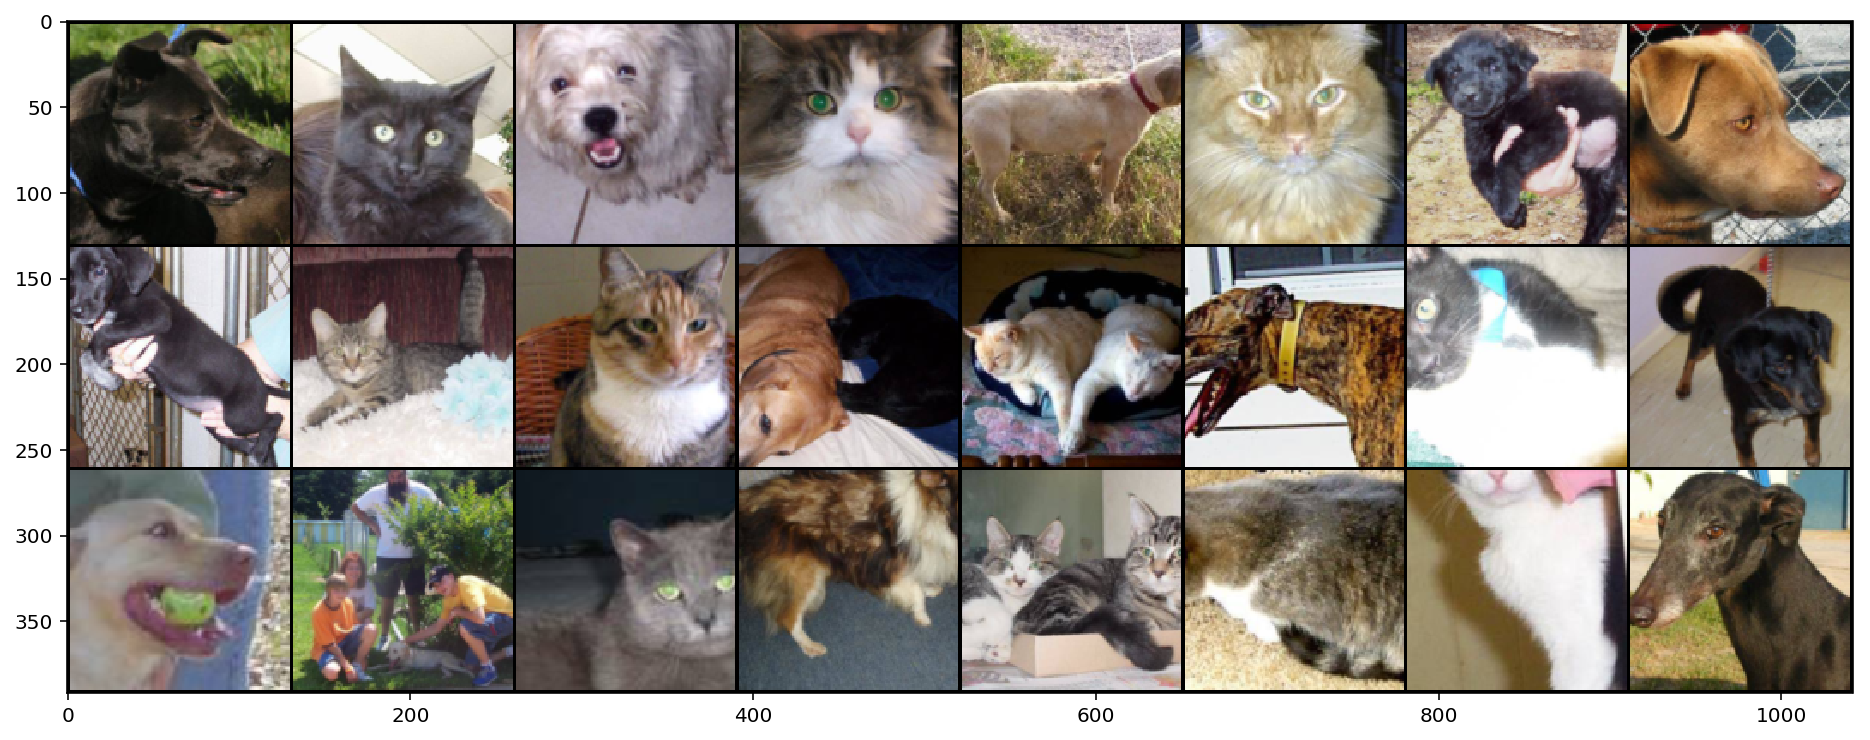

In [20]:
samples, labels = iter(dataloader).next()
print(samples.shape)
plt.figure(figsize=(16,24))
grid_imgs = torchvision.utils.make_grid(samples[:24])
np_grid_imgs = grid_imgs.numpy()
# tensor(batch, width, height)
plt.imshow(np.transpose(np_grid_imgs,(1,2,0)))

## Classifier

In [7]:
# parameter
for param in model.parameters():
    param.requires_grad = False

In [43]:
#resnet18Classifier 
fc = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(512,100)),
    ('relu',nn.ReLU()),
    ('drop',nn.Dropout(p=0.1)),
    ('fc2', nn.Linear(100,50)),
    ('relu',nn.ReLU()),
    ('fc3', nn.Linear(50,5)),
    ('relu',nn.ReLU()),
    ('fc4', nn.Linear(5,2)),
    ('output',nn.LogSoftmax(dim=1))
]))

model.fc = fc

In [44]:

model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Epoch : 1/3.. Training Loss : 0.661909
Epoch : 2/3.. Training Loss : 0.661428
Epoch : 3/3.. Training Loss : 0.660298


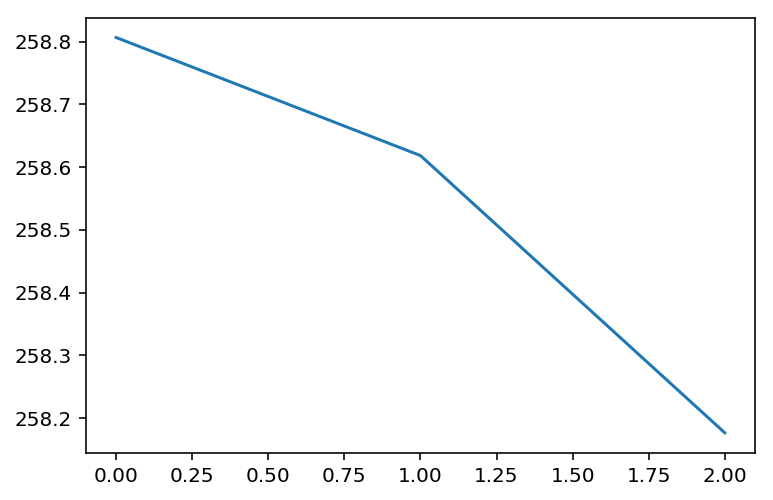

In [47]:

def train(model, trainloader, criterion, optimizer, epochs = 5):
    train_loss = []
    for e in range(epochs):
        running_loss =0
        for images, labels in trainloader:
            inputs, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad() # torch.Tensor
            img = model(inputs)
            
            loss = criterion(img, labels)
            running_loss+=loss
            loss.backward()
            optimizer.step() # backward gradient
        print('Epoch : {}/{}..'.format(e+1,epochs),
             'Training Loss : {:.6f}'.format(running_loss/len(trainloader)))
        train_loss.append(running_loss) # running_loss 
    plt.plot(train_loss,label = 'Training Loss')
    plt.show()
    

epochs =3
model.train() # train 
optimizer = optim.Adam(model.fc.parameters(),lr=0.002)
criterion = nn.NLLLoss()
train(model,dataloader, criterion, optimizer, epochs)


NLLLoss  
log likelihood loss. C classes  

cf) CrossEntropyLoss = NLLLoss + Logsoftmax


In [32]:

filename_pth = 'ckpt_resnet18_catdog.pth'
torch.save(model.state_dict(),filename_pth)


test_transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

testset = CatDogDataset(test_files, test_dir, mode='test', transform =test_transform)
testloader = DataLoader(testset, batch_size = 64, shuffle=False, num_workers=4)

# Testset

`with torch.no_grad()

In [33]:
model.eval()
fn_list = []
pred_list = []
for x, fn in testloader:
    with torch.no_grad():
        x = x.to(device)
        output = model(x)
        pred = torch.argmax(output, dim=1)
        fn_list += [n[:-4] for n in fn] # fn
        pred_list += [p.item() for p in pred]

submission = pd.DataFrame({"id":fn_list, "label":pred_list})
submission.to_csv('preds_resnet18.csv', index=False)        

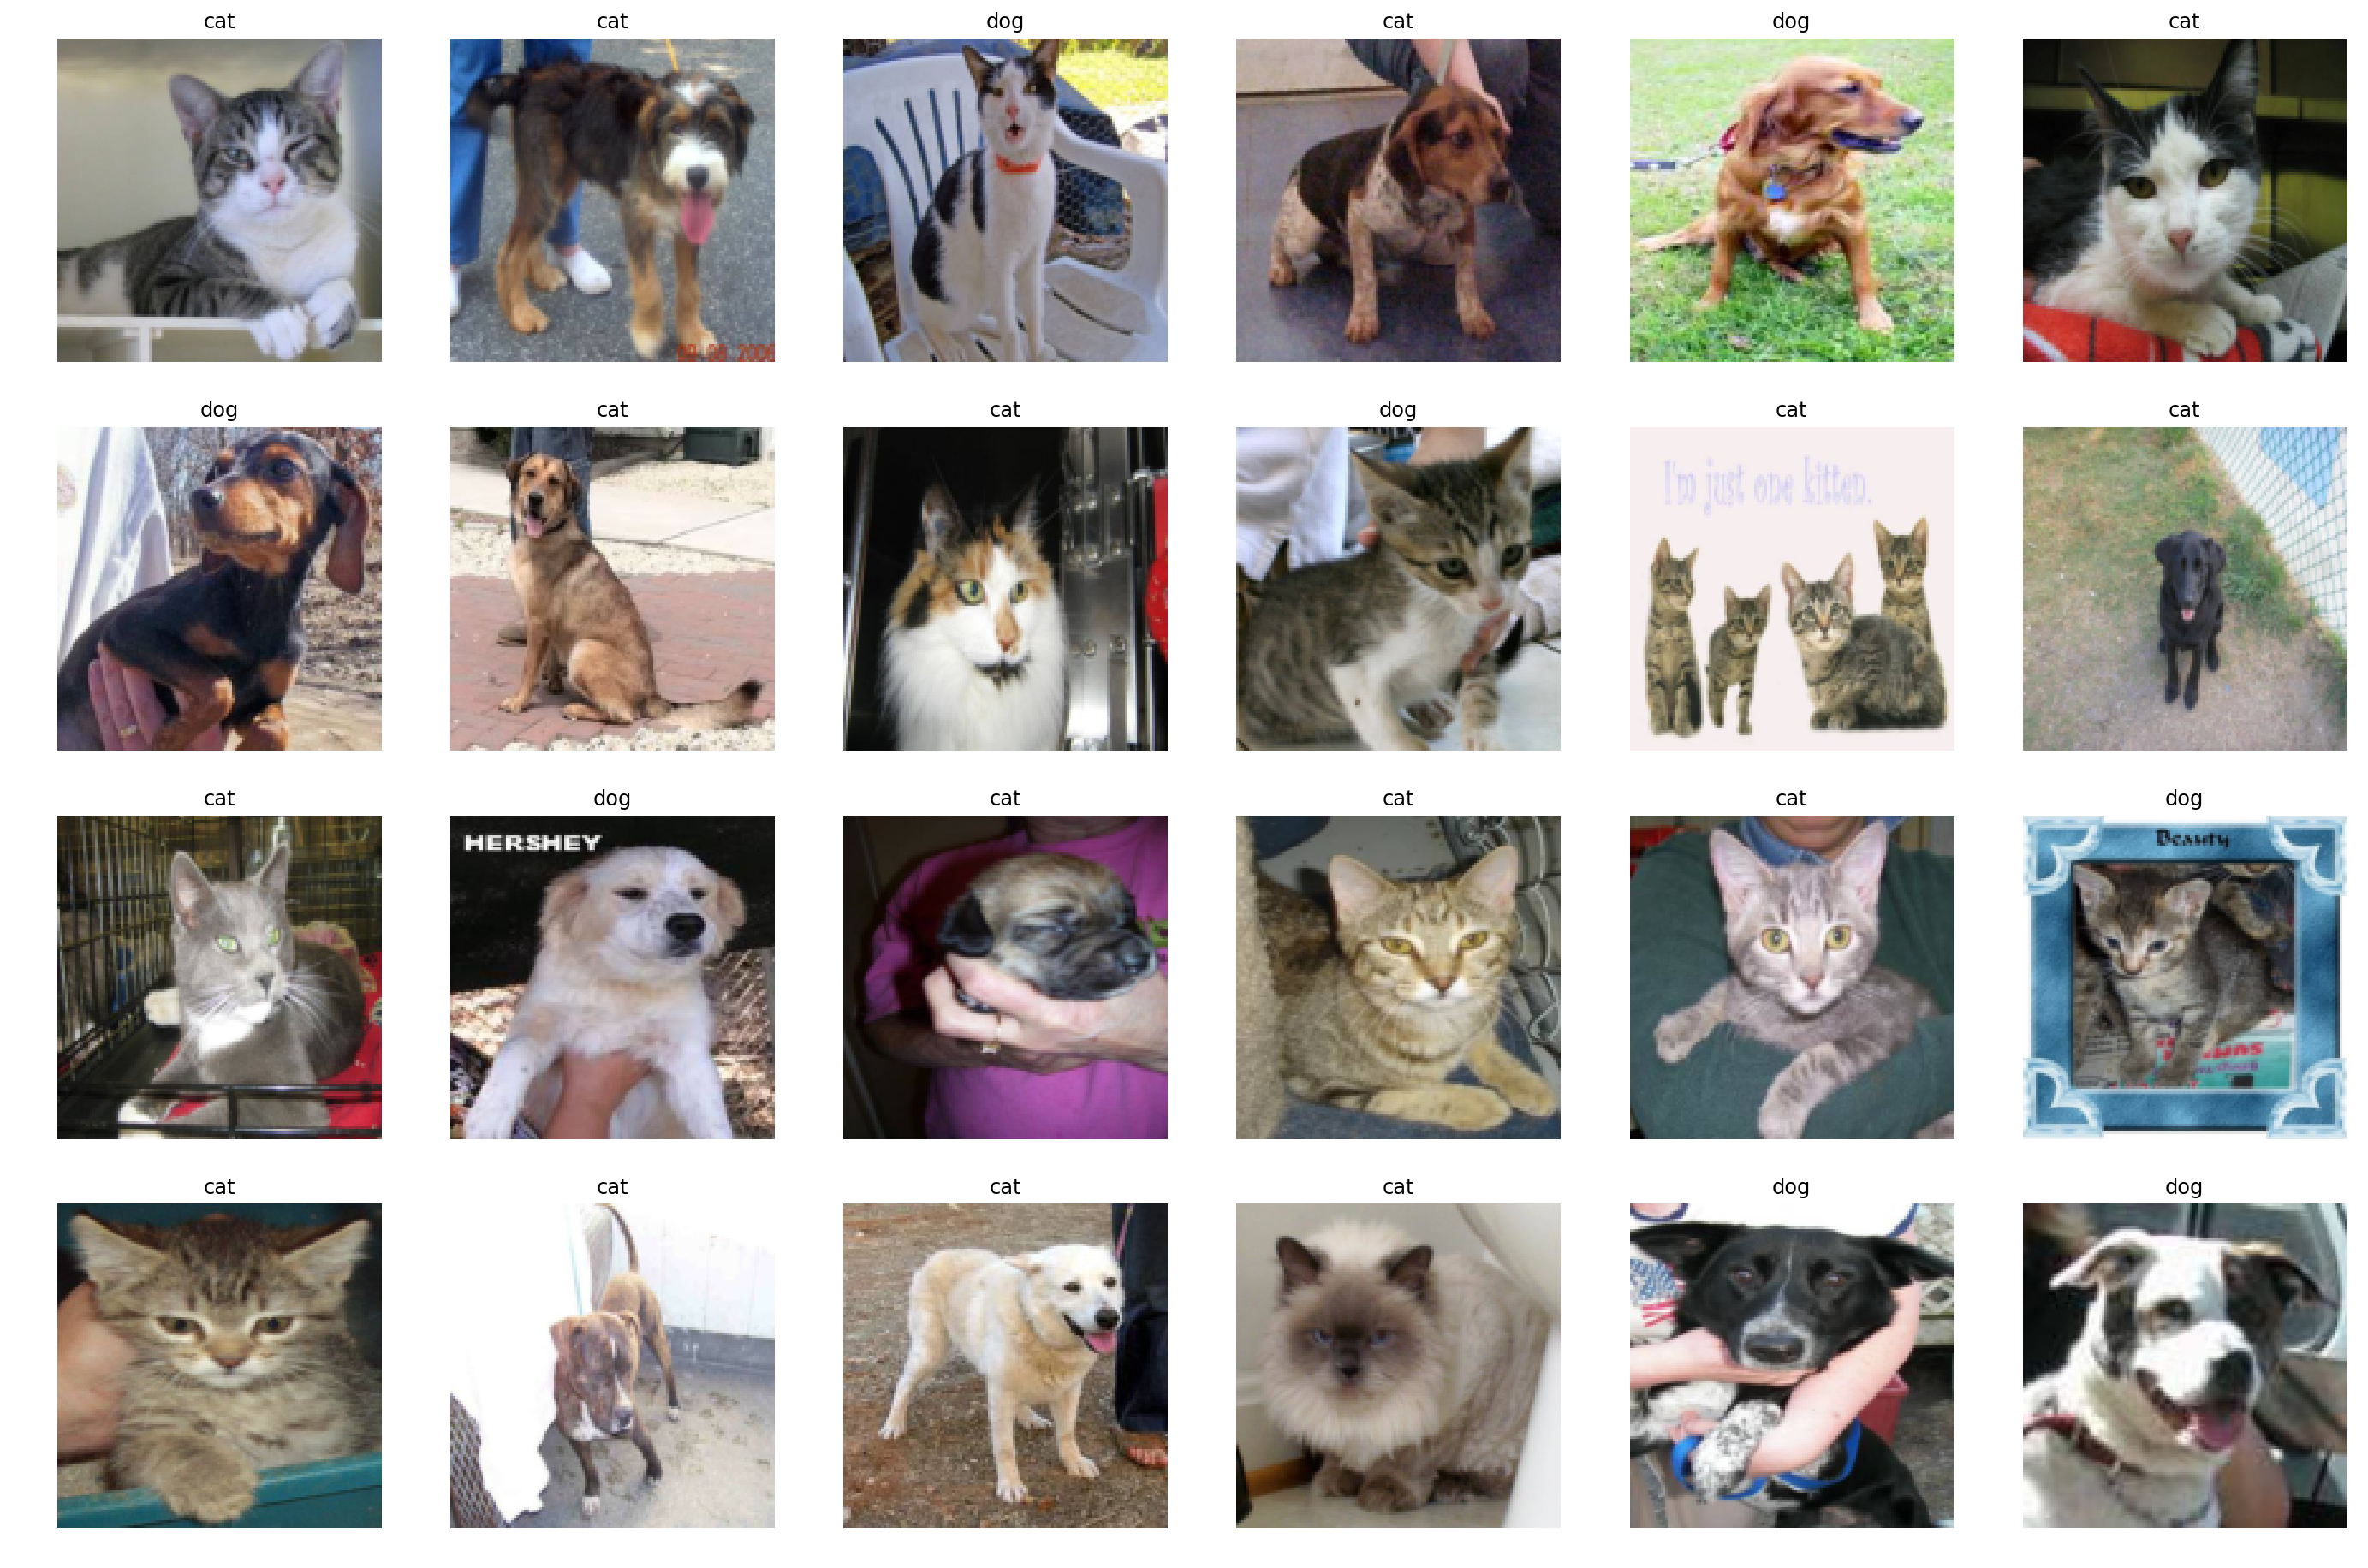

In [41]:
samples, _ = iter(testloader).next()
samples = samples.to(device)
fig = plt.figure(figsize=(24, 16))
fig.tight_layout()
output = model(samples[:24])
pred = torch.argmax(output, dim=1)
pred = [p.item() for p in pred]
ad = {0:'cat', 1:'dog'}
for num, sample in enumerate(samples[:24]):
    plt.subplot(4,6,num+1)
    plt.title(ad[pred[num]])
    plt.axis('off')
    sample = sample.cpu().numpy()
    plt.imshow(np.transpose(sample, (1,2,0)))

In [ ]:
import pandas as pd
sampleSubmission = pd.read_csv("../input/dogs-vs-cats/sampleSubmission.csv")